# **PREDICCIÓN DE POPULARIDAD DE CANCIONES EN BASE A AUDIO FEATURES**

In [ ]:
#montamos google drive 
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Importamos las Librerías

#LIBRERÍAS BASICAS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#WARNINGS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#PCA
from sklearn.decomposition import PCA

#SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score

#KNN
from sklearn.neighbors import KNeighborsClassifier

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

#HYPERTUNNING
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

#METRICAS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

#MEJORA DE MODELOS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#BOOSTING DE MODELOS
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
import xgboost as xgb 
from sklearn.linear_model import LinearRegression as LR
import lightgbm as lgb 
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
### PALETA DE COLORES A UTILIZAR -> SUMMER - MATPLOTLIB (COMUN O REVERSED)

palette = list(reversed(sns.color_palette("summer").as_hex()))
print("summer: " + str(palette))

### PALETA ALTERNATIVA -> VIRIDIS

palette = list(reversed(sns.color_palette("viridis").as_hex()))
print("viridis: " + str(palette))


summer: ['#dbed66', '#b6db66', '#92c866', '#6db666', '#49a466', '#249266']
viridis: ['#a0da39', '#4ac16d', '#1fa187', '#277f8e', '#365c8d', '#46327e']


## 1 Importación de datos

In [ ]:
#Importamos la base de datos
tracks = pd.read_csv('spotify_tracks.csv')

In [ ]:
tracks.head(5)

Unnamed: 0  acousticness                album_id  \
0           0         0.294  0D3QufeCudpQANOR7luqdr   
1           1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2           2         0.750  4tKijjmxGClg4JOLAyo2qE   
3           3         0.763  6FeJF5r8roonnKraJxr4oB   
4           4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  ...  \
0          1.0     235584.0  ...   
1          1.0     656960.0  ...   
2          1.0     492840.0  ...   
3          1.0     316578.0  ...   
4          1.0     558880.0  ...   

                                         preview_url speechiness    tempo  \
0  https://p.scdn.co/mp3-preview/1b05a902da3a251d...      0.0262  115.018   
1  https://p.scdn.co/mp3-preview/d8140736a6131cb5...      0.9220  115.075   
2  https://p.scdn.co/mp3-preview/c8af28fb15185b18...      0.9440   79.565   
3  https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...      0.9380  112.822   
4  https://p.scdn.co/mp3-preview/32be593c0eb82868...      0.9430   81.260   

   time_signature                                         track_href  \
0             4.0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...   
1             3.0  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...   
2             4.0  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...   
3             3.0  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...   
4             4.0  https://api.spotify.com/v1/tracks/1Vo802A38tPF...   

   track_name_prev  track_number                                   uri  \
0         track_14           1.0  spotify:track:5qljLQuKnNJf4F4vfxQB0V   
1          track_3           3.0  spotify:track:3VAX2MJdmdqARLSU5hPMpm   
2          track_4           4.0  spotify:track:1L3YAhsEMrGVvCgDXj2TYn   
3          track_9           1.0  spotify:track:6aCe9zzoZmCojX7bbgKKtf   
4          track_2           2.0  spotify:track:1Vo802A38tPFHmje1h91um   

   valence   type  
0   0.6220  track  
1   0.5890  track  
2   0.0850  track  
3   0.5330  track  
4   0.0906  track  

[5 rows x 32 columns]

In [ ]:
#eliminamos las columnas que se llaman unnamed que son el indice en el csv
tracks.drop("Unnamed: 0",axis=1, inplace=True)

In [ ]:
print('tracks shape: ', tracks.shape)

tracks shape:  (101939, 31)


In [ ]:
print('tracks columns: ', tracks.columns)

tracks columns:  Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')


## 2 Creación de la variable categorica target

Calculamos los cuartiles de la variable 'popularity' y creamos una nueva columna 'popularity_cat' donde a partir del cuartil en en que se encuentre el valor de popularidad de la canción se reemplace por las categorias:

- < Q1 - Q3 = nohit
- .> Q3 = hit

In [ ]:
#Calculamos el quantil Q3= 0.75
q75 = tracks["popularity"].quantile(0.75)
print("Valor del cuantil 75: ", q75)

Valor del cuantil 75:  52.0


In [ ]:
#Reemplazamos en el data frame en la nueva columna "popularity_cat"
tracks.loc[tracks["popularity"] < q75, 'popularity_cat'] = 'nohit'
tracks.loc[tracks["popularity"] >= q75, 'popularity_cat'] = 'hit'

In [ ]:
tracks['popularity_cat'].head()

0    nohit
1    nohit
2    nohit
3    nohit
4    nohit
Name: popularity_cat, dtype: object

In [ ]:
tracks['popularity_cat'].tail()

101934    nohit
101935    nohit
101936      hit
101937      hit
101938    nohit
Name: popularity_cat, dtype: object

## 3 Save parcial del dataframe

In [ ]:
tracks.to_csv("datacat.csv") # A partir de ahora trabajaremos con este archivo

## 4 Exploratory Data Analysis

In [ ]:
#Cargamos el dataframe
data_cat= pd.read_csv('datacat.csv')
data_cat.drop("Unnamed: 0",axis=1, inplace=True) #eliminamos la columna unnamed
data_cat.head(5)

acousticness                album_id  \
0         0.294  0D3QufeCudpQANOR7luqdr   
1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2         0.750  4tKijjmxGClg4JOLAyo2qE   
3         0.763  6FeJF5r8roonnKraJxr4oB   
4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  energy  ... speechiness    tempo  time_signature  \
0          1.0     235584.0   0.606  ...      0.0262  115.018             4.0   
1          1.0     656960.0   0.308  ...      0.9220  115.075             3.0   
2          1.0     492840.0   0.931  ...      0.9440   79.565             4.0   
3          1.0     316578.0   0.126  ...      0.9380  112.822             3.0   
4          1.0     558880.0   0.942  ...      0.9430   81.260             4.0   

                                          track_href  track_name_prev  \
0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...         track_14   
1  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...          track_3   
2  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...          track_4   
3  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...          track_9   
4  https://api.spotify.com/v1/tracks/1Vo802A38tPF...          track_2   

   track_number                                   uri  valence   type  \
0           1.0  spotify:track:5qljLQuKnNJf4F4vfxQB0V   0.6220  track   
1           3.0  spotify:track:3VAX2MJdmdqARLSU5hPMpm   0.5890  track   
2           4.0  spotify:track:1L3YAhsEMrGVvCgDXj2TYn   0.0850  track   
3           1.0  spotify:track:6aCe9zzoZmCojX7bbgKKtf   0.5330  track   
4           2.0  spotify:track:1Vo802A38tPFHmje1h91um   0.0906  track   

  popularity_cat  
0          nohit  
1          nohit  
2          nohit  
3          nohit  
4          nohit  

[5 rows x 32 columns]

### 4.1 Eliminación de columnas

Eliminamos las columnas que tienen strings como URLs, IDs, URIs que no vamos a utilizar para el modelo

Ademas vemos los descriptivos de las demas variables

In [ ]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   acousticness       101939 non-null  float64
 1   album_id           101939 non-null  object 
 2   analysis_url       101939 non-null  object 
 3   artists_id         101939 non-null  object 
 4   available_markets  101939 non-null  object 
 5   country            101939 non-null  object 
 6   danceability       101939 non-null  float64
 7   disc_number        101939 non-null  float64
 8   duration_ms        101939 non-null  float64
 9   energy             101939 non-null  float64
 10  href               101939 non-null  object 
 11  id                 101939 non-null  object 
 12  instrumentalness   101939 non-null  float64
 13  key                101939 non-null  float64
 14  liveness           101939 non-null  float64
 15  loudness           101939 non-null  float64
 16  ly

In [ ]:
drop_string_columns = ['album_id','analysis_url','artists_id', 'available_markets', 'country', 'href','id','lyrics','name','playlist',
                      'preview_url','track_href','track_name_prev','uri','type']

data = data_cat.drop(drop_string_columns, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      101939 non-null  float64
 1   danceability      101939 non-null  float64
 2   disc_number       101939 non-null  float64
 3   duration_ms       101939 non-null  float64
 4   energy            101939 non-null  float64
 5   instrumentalness  101939 non-null  float64
 6   key               101939 non-null  float64
 7   liveness          101939 non-null  float64
 8   loudness          101939 non-null  float64
 9   mode              101939 non-null  float64
 10  popularity        101939 non-null  float64
 11  speechiness       101939 non-null  float64
 12  tempo             101939 non-null  float64
 13  time_signature    101939 non-null  float64
 14  track_number      101939 non-null  float64
 15  valence           101939 non-null  float64
 16  popularity_cat    10

In [ ]:
print("Shape del dataframe: ")
data.shape

Shape del dataframe: 


(101939, 17)

In [ ]:
print("Cantidad de valores nulos por columna: ")
data.isnull().sum()
#la data no contiene valores nulos

Cantidad de valores nulos por columna: 


acousticness        0
danceability        0
disc_number         0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
time_signature      0
track_number        0
valence             0
popularity_cat      0
dtype: int64

In [ ]:
print("Estructura de la data: ")
type(data)

Estructura de la data: 


pandas.core.frame.DataFrame

### 4.2 Estadística descriptiva 

In [ ]:
data.describe().round(2)

acousticness  danceability  disc_number  duration_ms     energy  \
count     101939.00     101939.00    101939.00     101939.0  101939.00   
mean           0.35          0.59         1.03     246770.8       0.59   
std            0.33          0.18         0.57     190430.3       0.26   
min            0.00          0.00         1.00       1155.0       0.00   
25%            0.04          0.48         1.00     184000.0       0.41   
50%            0.24          0.61         1.00     216893.0       0.63   
75%            0.64          0.71         1.00     261055.0       0.80   
max            1.00          0.99        81.00    5505831.0       1.00   

       instrumentalness        key   liveness   loudness       mode  \
count         101939.00  101939.00  101939.00  101939.00  101939.00   
mean               0.15       5.27       0.20      -9.46       0.62   
std                0.30       3.58       0.18       6.20       0.49   
min                0.00       0.00       0.00     -60.00       0.00   
25%                0.00       2.00       0.10     -11.15       0.00   
50%                0.00       5.00       0.12      -7.60       1.00   
75%                0.03       8.00       0.24      -5.51       1.00   
max                1.00      11.00       1.00       2.72       1.00   

       popularity  speechiness      tempo  time_signature  track_number  \
count   101939.00    101939.00  101939.00       101939.00     101939.00   
mean        39.78         0.13     118.36            3.88          4.61   
std         16.79         0.20      30.22            0.52          7.18   
min          0.00         0.00       0.00            0.00          1.00   
25%         29.00         0.04      95.97            4.00          1.00   
50%         41.00         0.05     118.07            4.00          2.00   
75%         52.00         0.10     136.04            4.00          6.00   
max         97.00         0.97     244.04            5.00        655.00   

         valence  
count  101939.00  
mean        0.48  
std         0.26  
min         0.00  
25%         0.27  
50%         0.48  
75%         0.69  
max         0.99

In [ ]:
### ANALISIS DE VARIABLES FLOAT
variables_float = ['acousticness','danceability','disc_number','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness',
                   'tempo','time_signature','valence']

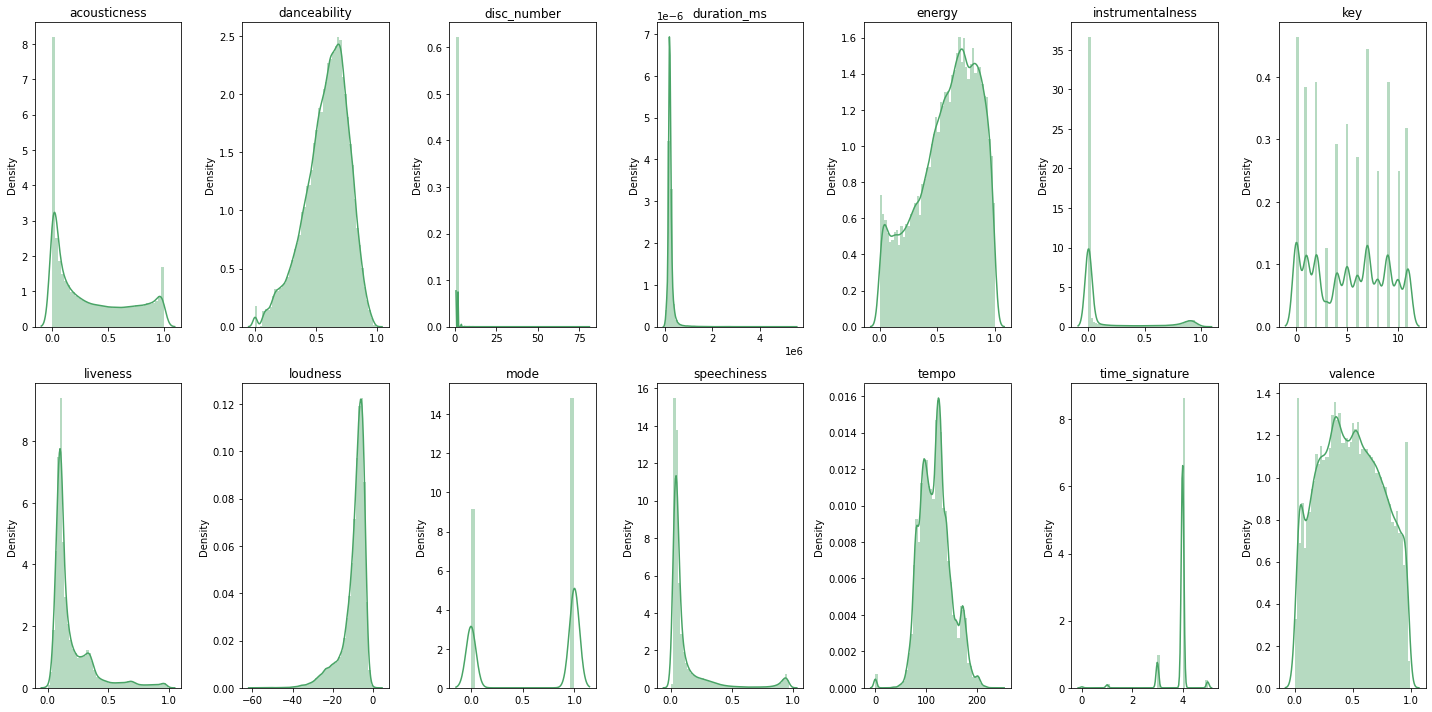

In [ ]:
#Visualizamos la distribución de las variables
columns = 7

fig, axes = plt.subplots(len(variables_float) //columns, columns, figsize=(20,10))

for current_idx, variable in enumerate(variables_float):
    i = current_idx // columns
    j = current_idx % columns 
    sns.distplot(data[variable], ax=axes[i][j],color='#49a466')
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()
plt.show()

Podemos ver que las variables no tienen una distribución normal. 
Se observa que muchas variables poseen una distribución asimétrica hacia la derecha (danceability, energy, loudness) y otras variables poseen una distribución sesgada hacia la izquierda (duration, instrumentalness, liveness, speechiness). 
En cuanto a la moda, podemos ver que muchas poseen una distribución bimodal (acousticness, instrumentalness, mode, speechiness) y tambien hay variables que presetan multimodalidad (key, energy, tempo, etc)



### 4.3 Análisis de outliers

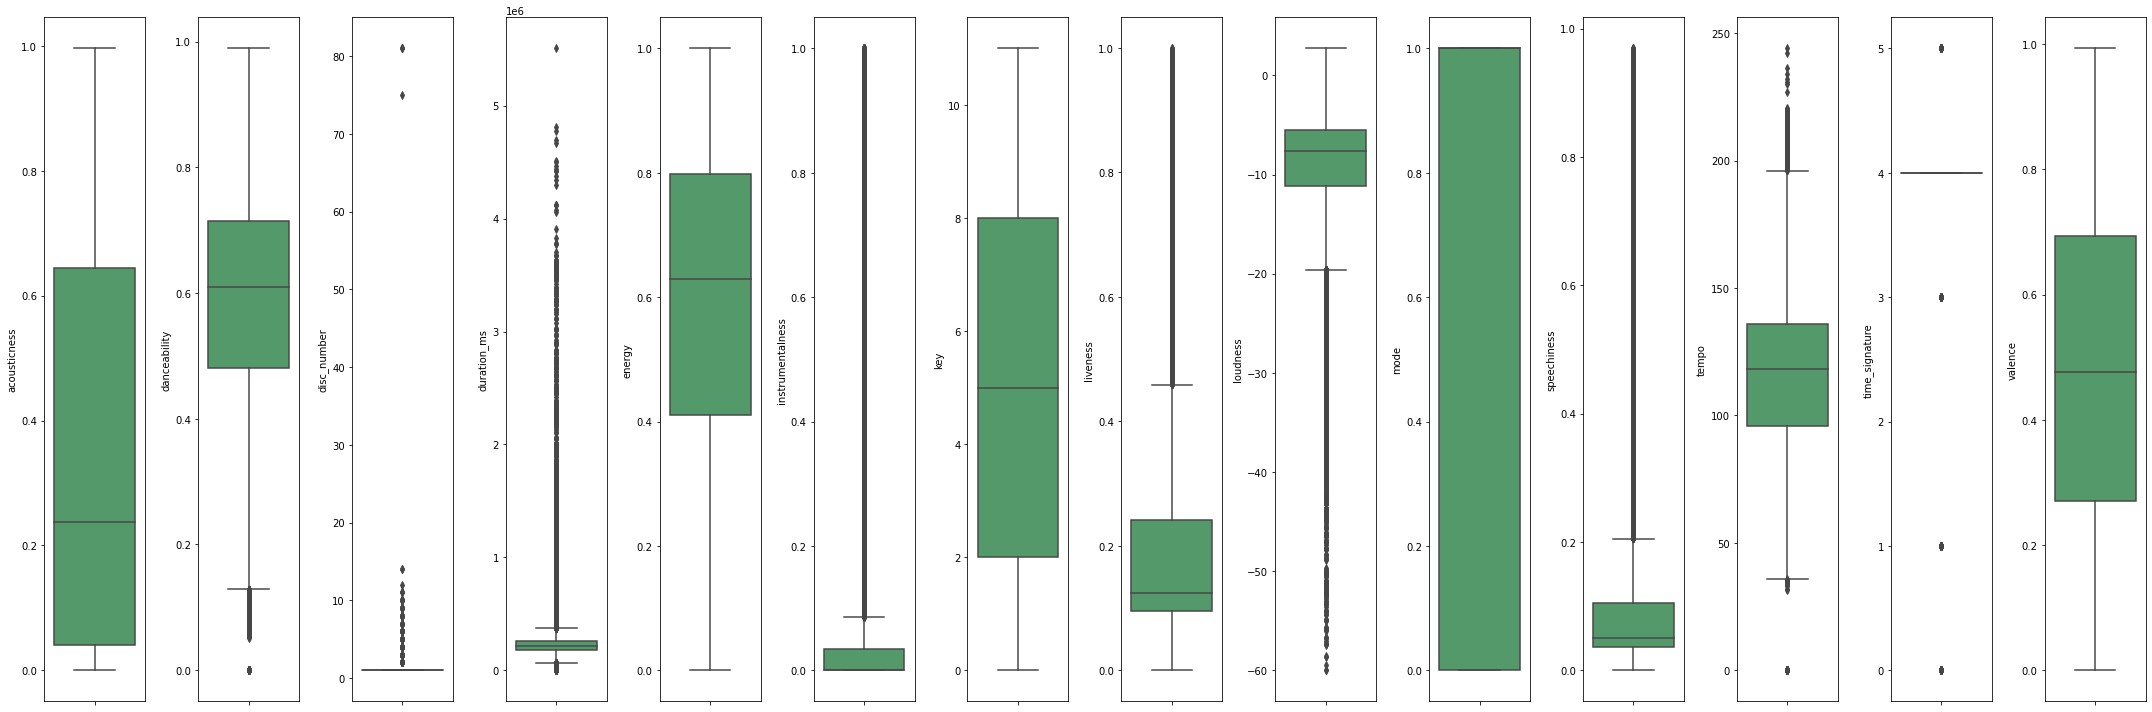

In [ ]:
fig, axes = plt.subplots(1, len(variables_float), figsize=(30,10))


for ax, variable in zip(axes, variables_float):
    ax = sns.boxplot( y=variable, data=data, ax=ax,color='#49a466')
plt.tight_layout()

Podemos ver que las siguientes variables tienen gran cantidad de outliers que vale la pena limpiar: duration y disc number. El resto tiene que ver con la distribucion no simetrica de las variables que describen, como por ejemplo, tener un sesgo hacia concentracion de canciones de baja instrumentalidad o de bajo tono acustico.

In [ ]:
#funcion que
def remove_outliers(df,name='feature'):
    #Store the 10th and 90th percentile 
    q10,q90=np.percentile(df[name],10),np.percentile(df[name],90)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q90-q10)
    #Create variable of lower and upper cut
    lower,upper=q10-iqr_cut,q90+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df
    return df

In [ ]:
#funcion que
def remove_outliers2(df,name='feature'):
    #Store the 5th and 95th percentile 
    q5,q95=np.percentile(df[name],5),np.percentile(df[name],95)
    #Calculate the Interquartile range
    iqr_cut=1.5*(q95-q5)
    #Create variable of lower and upper cut
    lower,upper=q5-iqr_cut,q95+iqr_cut
    #Remove the outliers
    df=df[(df[name] >= lower) & (df[name] <= upper)]
    return df

In [ ]:
data.columns

Index(['acousticness', 'danceability', 'disc_number', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'time_signature', 'track_number', 'valence',
       'popularity_cat'],
      dtype='object')

In [ ]:
data=remove_outliers2(data,'disc_number')
len(data)

100035

In [ ]:
data=remove_outliers(data,'duration_ms')
len(data)

98280

In [ ]:
variables_float2 = ['acousticness','danceability','disc_number','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness',
                   'tempo','time_signature','valence']

C:\Users\Melisa\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


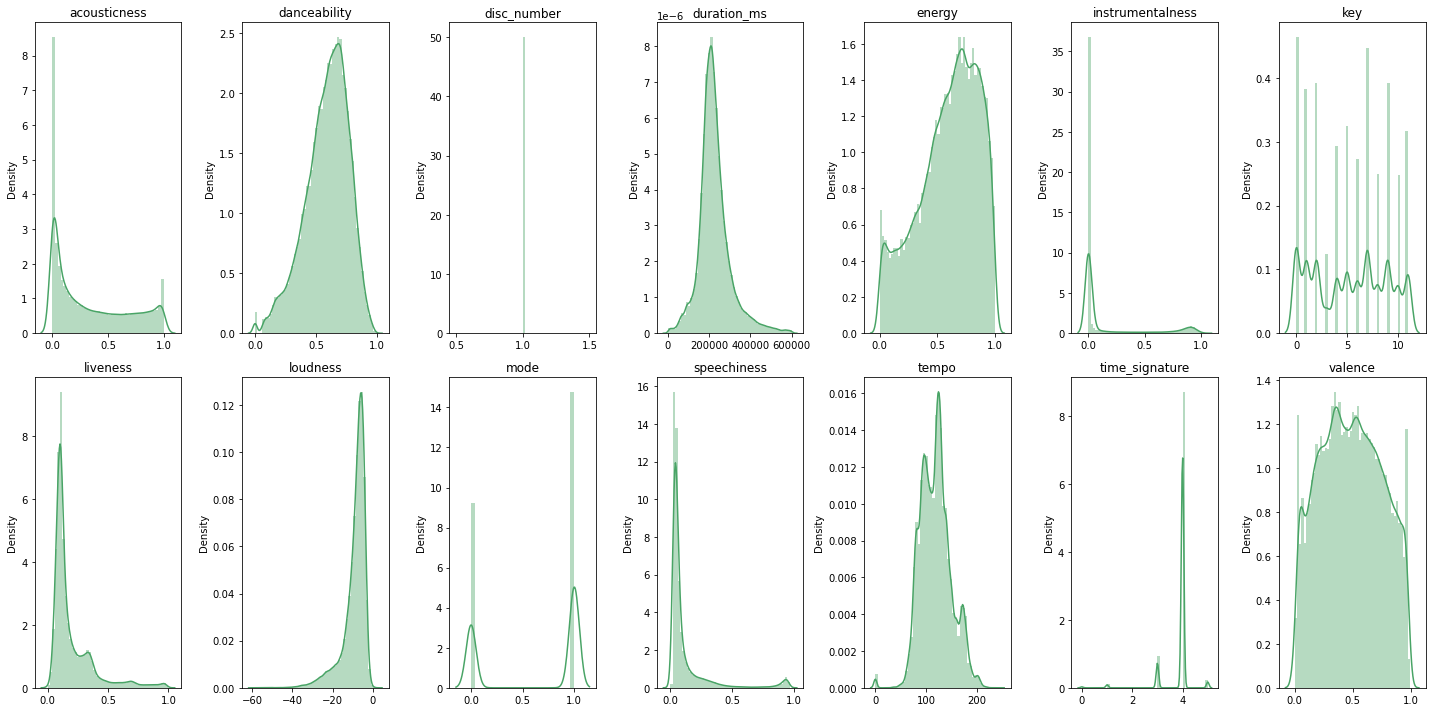

In [ ]:
#Visualizamos la distribución de las variables post remover outliers
columns = 7

fig, axes = plt.subplots(len(variables_float2) //columns, columns, figsize=(20,10))

for current_idx, variable in enumerate(variables_float2):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(data[variable], ax=axes[i][j],color='#49a466')
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()
plt.show()

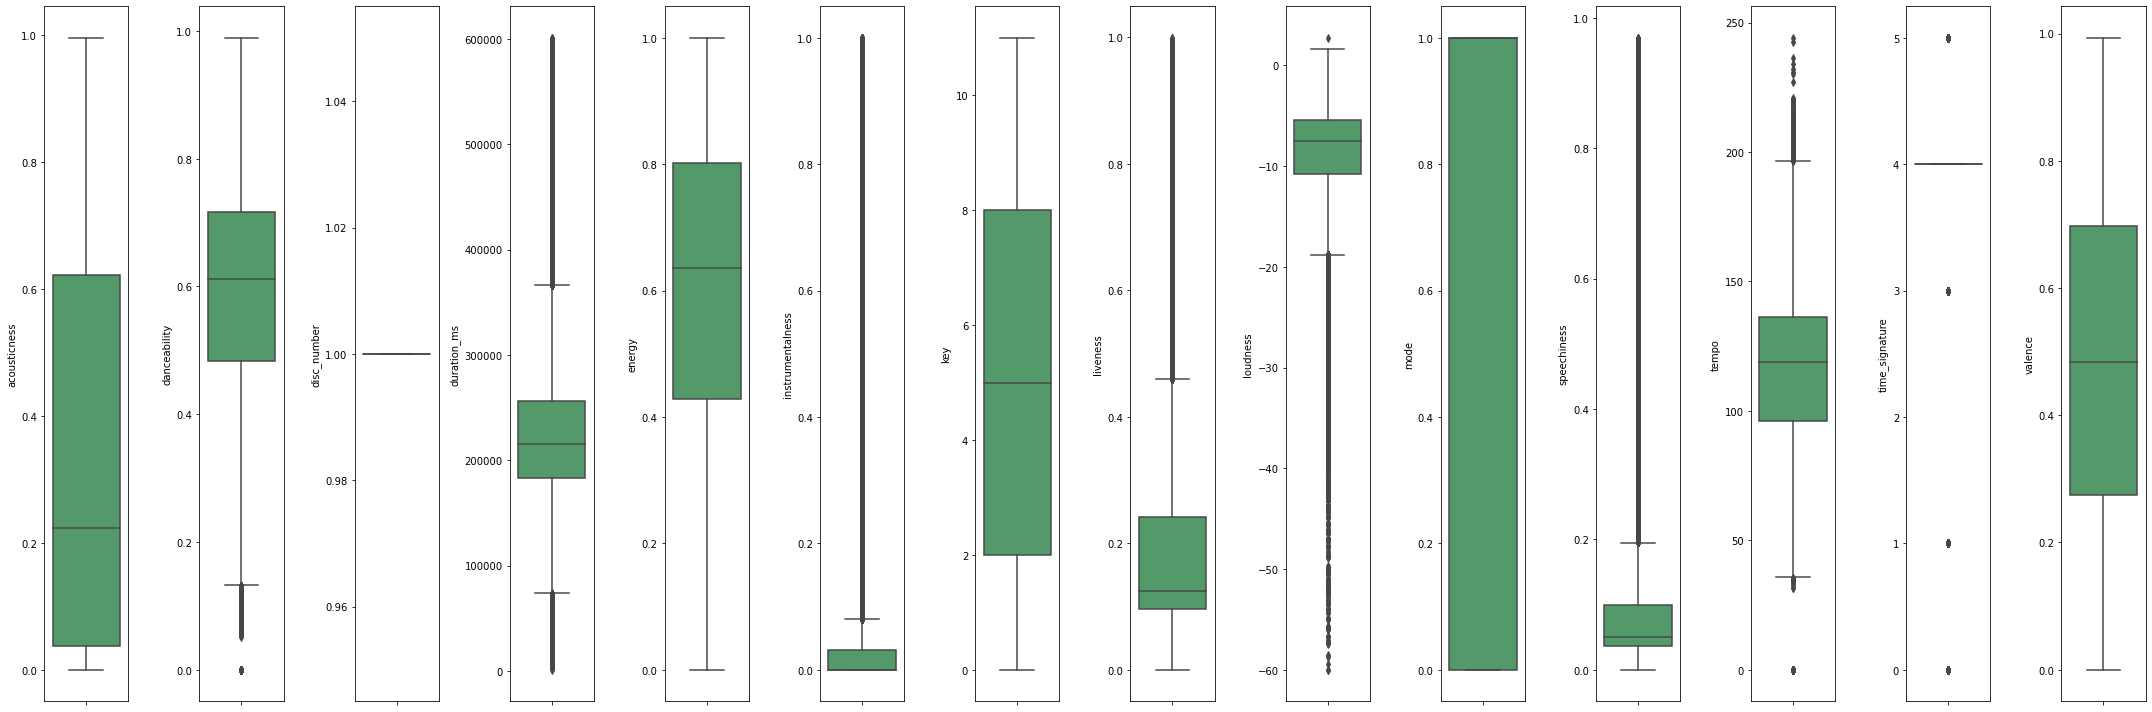

In [ ]:
fig, axes = plt.subplots(1, len(variables_float2), figsize=(30,10))


for ax, variable in zip(axes, variables_float2):
    ax = sns.boxplot( y=variable, data=data, ax=ax,color='#49a466')
plt.tight_layout()

Al observar la distribución de la variable disc_number y compararla con el gráfico de la sección 4.2 se observa que ahora disc_number se encuentra centrada en 1.
En cuanto a la variable duration_ms ahora se aprecia mejor la distribución de la variable, que es unimodal con sesgo hacia la izquierda


### 4.4 Análisis de correlación

In [1]:
#Vamos a eliminar la variable disc_number ya que no es de interés
correlation= data.drop('disc_number', axis=1).corr(method="pearson")

NameError: ignored

In [ ]:
#HEATMAP
plt.figure(figsize=(15,15)) 

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'summer') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Vemos que las variables que se encuentran altamente correlacionadas positivamente son energy y loudness, y una correlacion positiva mas debil entre valence y danceability. Hay correlacione negativas entre acousticness con loudness y energy y entre instrumentalness y loudness




### 4.5 Analisis de Missing Values

In [ ]:
#Nos fijamos cuales son esas filas
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [acousticness, danceability, disc_number, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, popularity, speechiness, tempo, time_signature, track_number, valence, popularity_cat]
Index: []

No se encuentran filas que contengan missing values en este dataframe

## 5 Analisis Univariado

### 5.1 Análisis de la variable target: 'popularity_cat'

In [ ]:
data['popularity_cat']

0         nohit
2         nohit
3         nohit
4         nohit
5         nohit
          ...  
101934    nohit
101935    nohit
101936      hit
101937      hit
101938    nohit
Name: popularity_cat, Length: 98280, dtype: object

In [ ]:
print("Cantidad de tracks en cada categoría")
data.groupby(by= "popularity_cat").size()

Cantidad de tracks en cada categoría


popularity_cat
hit      25355
nohit    72925
dtype: int64

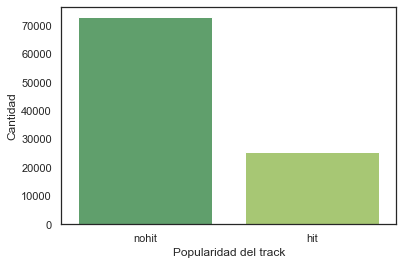

In [ ]:
sns.set_theme(style="white")
ax = sns.countplot(x="popularity_cat", data=data, palette='summer')
ax.set(xlabel='Popularidad del track', ylabel='Cantidad')
plt.show()

Analisis: La cantidad de canciones se encuentra distribuida de manera desbalanceada entre las dos categorias de popularidad

### 5.2 Análisis de la popularidad de la canción

Vamos a estudiar la distribución de la variable original que se utilizó para crear la variable target

In [ ]:
print("Cantidad de puntuaciones de popularidad")
data['popularity'].count()

Cantidad de puntuaciones de popularidad


98280

In [ ]:
print("Suma de la popularidad de todas los tracks")
data['popularity'].sum()

Suma de la popularidad de todas los tracks


3970279.0

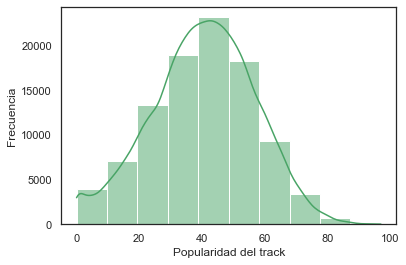

In [ ]:
ax= sns.histplot(data['popularity'], bins= 10, kde= True, color='#49a466')
ax.set(xlabel='Popularidad del track', ylabel='Frecuencia')
plt.show()

Vemos que la popularidad de la canciones tiene una distribución normal, con la mayor popularidad de la cancion al rededor del intervalo de  40-50 puntos. La frecuencia de las canciones populares (>75) es muy baja

### 5.3 Analisis de las variables 'Audio Features'

In [ ]:
audio_features= data[["acousticness", "liveness", "loudness", "danceability",
                      "energy", "instrumentalness", "duration_ms",'key','speechiness','tempo','valence']]

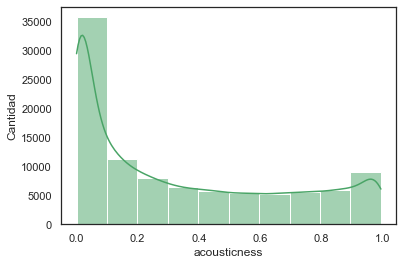

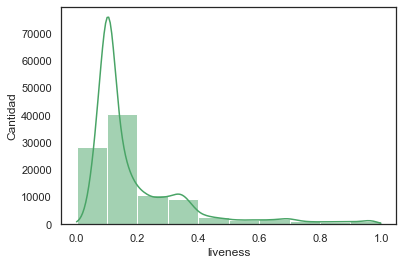

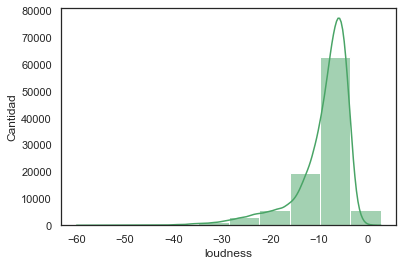

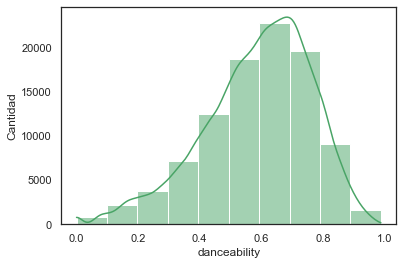

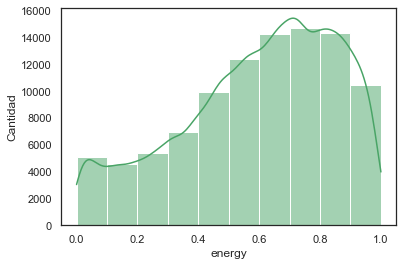

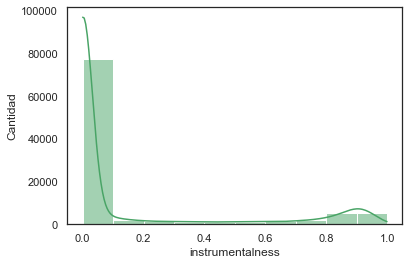

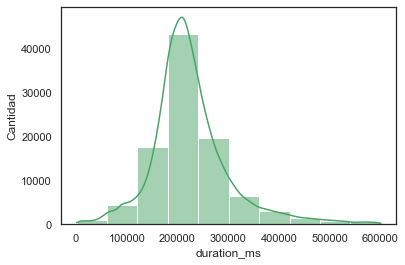

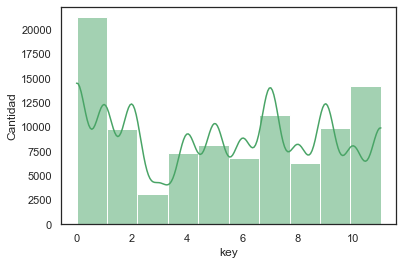

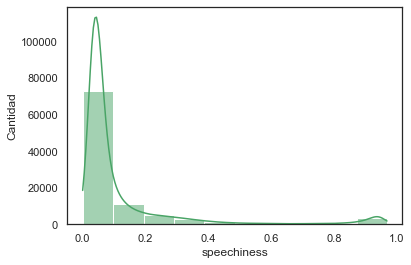

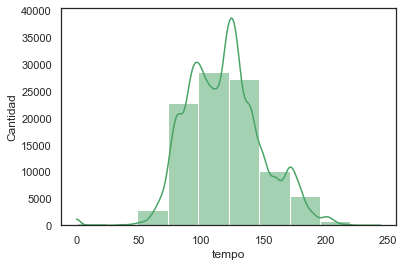

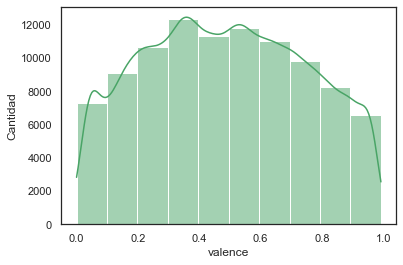

In [ ]:
for i in audio_features:
    
    draw= sns.histplot(data[i], bins= 10, kde= True, color='#49a466') 
    draw.set(ylabel='Cantidad')
    plt.show()

*ANALISIS* POR VARIABLE:



*   Acousticness: representa del 0 al 1 la probabilidad de que el track sea una versión acústica. La mayoría de tracks no lo son; en promedio la probabilidad de que un track sea o no acústico es la misma (valores del medio).
*   Liveness: detecta la presencia de una audiencia en el track. Un valor de 0.8 es considerado como un track con alta probabilidad de ser tocado en vivo. La mayoria de los tracks no tienen audiencia o tienen muy baja probabilidad de ser tocados en vivo.
*   Loudness: el promedio de la amplitud del sonido del track, en dB (el "volumen" del track). La escala es negativa porque se toma como presión de referencia, para calcular los dB, la máxima intensidad que puede percibir el oído humano. La mayoría de los tracks en general manejar un alto volumen.
*   Danceability: cuán "bailable" es el track, según variables como ritmo, tempo, BPM. Va entre 0 y 1, siendo 1 el más bailable y 0 el menos bailable. La mayoria de los tracks tienen son más bailables que no, ya que el histograma tiene un sesgo hacia la izquierda.
*   Energy: mide la percepción de intensidad y actividad del track, del 0 al 1. Los tracks con mayor energía son rápidos, de volumen alto y con ruido. La mayoría de los tracks tienen alta energía (mayor que 0.5)
*   Instrumentalness: es la probabilidad de que el track no contenga vocales, entre 0 y 1. Sonidos como "ah" u "oh" no son considerados vocales. Valores arriba de 0.5 tienen gran probabilidad de ser sólo instrumentales. Hay una clara predominancia de tracks vocales.
*   Duration_ms: duración del track en milisegundos. El eje de las absisas está en notación científica (1e10). La mayoría de los tracks dura entre 0 y 500.000 milisegundos aproximadamente (alrededor de 8 minutos).
*   Key: nota en la cual está escrito el track. Se usa como escala el Pitch Class https://davidkulma.com/musictheory/integers. Cuando no se encuentra ninguna key, el valor es -1. La mayoria de los tracks están escritos en C o C#.
*   Speechiness: mide la presencia de vocales en el track, entre 0 y 1. Valores por arriba de 0.66 sean probablemente tracks sólo de vocales. Valores por debajo de 0.33 representan tracks que no tienen o tienen muy pocas vocales; la mayoría de los tracks son de este tipo.
*   Tempo: el tiempo promedio de los tracks, medido en BPM. La mayoría de los tracks tienen entre 75 y 150 BPM, con muy pocos tracks de más de 200 BPM y menos de 75 BPM.
*   Valence: medida de la "felicidad" de una canción, entre 0 y 1. Los tracks felices suenan eufóricos, animados. La distribución de todos los tracks es bastante regular; no hay una marcada tendencia de mayor o menor felicidad.

## 6 Analisis Bivariado

In [ ]:
data.dtypes

acousticness        float64
danceability        float64
disc_number         float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
popularity          float64
speechiness         float64
tempo               float64
time_signature      float64
track_number        float64
valence             float64
popularity_cat       object
dtype: object

In [ ]:
#creamos una lista con las variables audiofeatures

var_audio_features= ["acousticness", "liveness", "loudness", "danceability",
                      "energy", "instrumentalness", "duration_ms",'key','speechiness','tempo','valence']

<AxesSubplot:xlabel='valence', ylabel='popularity_cat'>

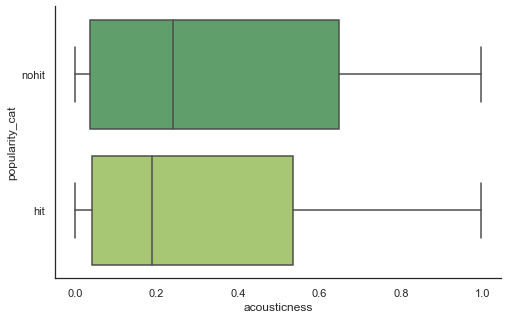

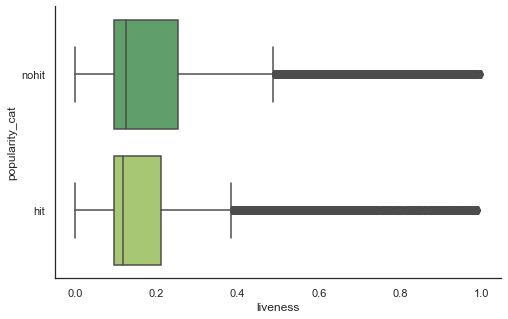

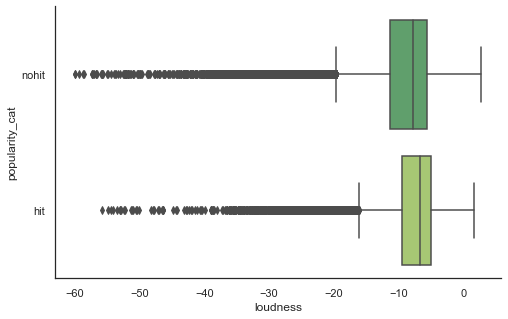

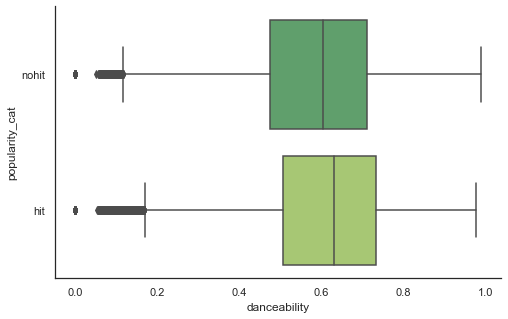

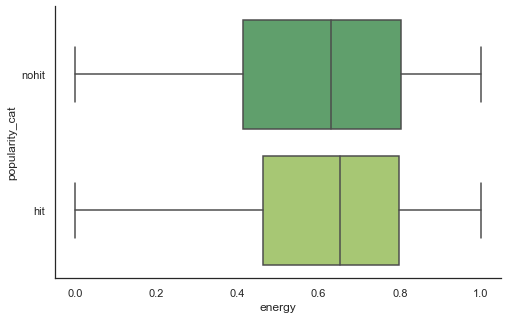

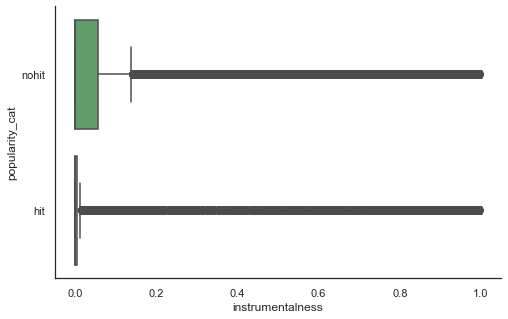

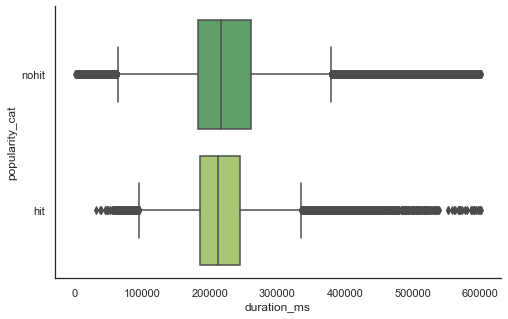

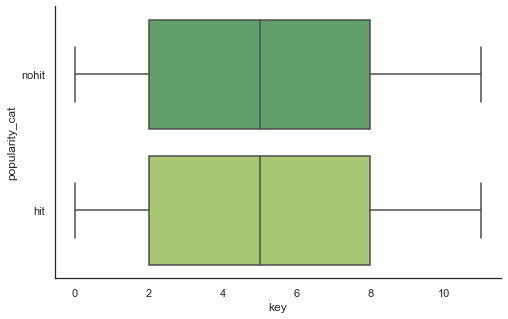

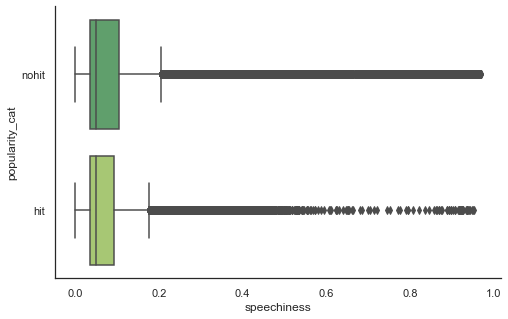

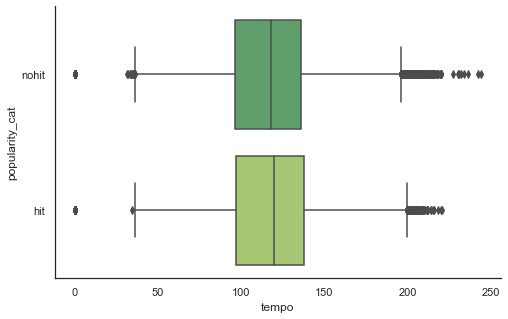

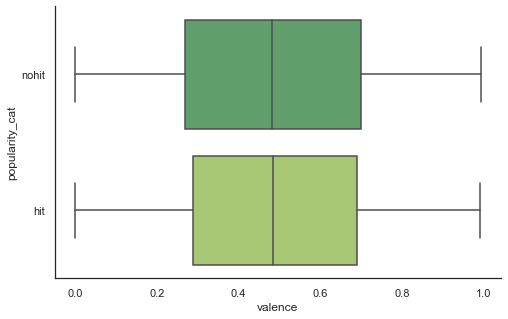

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[0],data=data, orient="h", palette="summer")



f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[1],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[2],data=data, orient="h", palette="summer")



f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[3],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[4],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[5],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[6],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[7],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[8],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[9],data=data, orient="h", palette="summer")


f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="popularity_cat", x=var_audio_features[10],data=data, orient="h", palette="summer")


- Acousticness: Se observa que ambas categorías tienen mínimos y máximos similares para acousticness. El RIC de las canciones consideradas no hit es menor, al igual que la mediana, en comparación a las canciones consideradas no hits
- Liveness: El maximo de las canciones hits, así como el RIC y la mediana son menores en comparación con las canciones no hits
- Loudness: Las canciones hit tienen un menor mínimo y RIC y una mayor mediana con respecto a las canciones no hit.
- Danceability: se observa la misma tendencia que en la variable loudness, donde las canciones que son hits poseen una mayor mediana de danceability
- Energy: se observa la misma tendencia que en loudness y danceability
- Instrumentalness: se observa que las canciones hit poseen un menor instrumentalness, tanto en mediana como en RIC, con respecto a las canciones no hit
- Duration: No se observa diferencia entre la mediana de duracion de las canciones hit y no hit. El RIC de las canciones hit es un poco más acotado
- Key: No se observan diferencias para la variable key entre canciones hit y no hit
- Speechiness: El rango min-max de las canciones hit es un poco más acotado, pero no hay diferencias en las medianas
- Tempo:  No se observan diferencias entre las categorías de popularidad
- Valence: se observa la misma tendencia que para la variable tempo


## 7 Analisis Multivariado

Vamos a trabajar principalmente sobre las variables relacionados a los features de audio y relacionarlas con la popularidad.

Primero, las escalamos a que esten todas en una misma escala y dibujamos un radar por rango de popularidad (variable target) para ver visualmente como se comporta cada categoria.

### 7.1 Gráfico de Radar

In [ ]:
# primero armo la audiofeatures full
audio_features_full= data[["acousticness", "liveness", "loudness", "danceability", "energy", "instrumentalness", "duration_ms"
                     , "key", "speechiness", "valence", "tempo",]]

In [ ]:
audio_features_full

acousticness  liveness  loudness  danceability  energy  \
0           0.294000    0.1510    -7.447         0.698   0.606   
2           0.750000    0.9380   -13.605         0.466   0.931   
3           0.763000    0.1130   -20.254         0.719   0.126   
4           0.770000    0.9170   -13.749         0.460   0.942   
5           0.971000    0.6330    -7.740         0.367   0.349   
...              ...       ...       ...           ...     ...   
101934      0.005640    0.0875    -4.578         0.602   0.904   
101935      0.000406    0.2420    -5.561         0.177   0.823   
101936      0.004510    0.0606    -6.614         0.539   0.883   
101937      0.333000    0.0899    -6.426         0.716   0.748   
101938      0.028400    0.4840    -4.781         0.500   0.869   

        instrumentalness  duration_ms   key  speechiness  valence    tempo  
0               0.000003     235584.0  10.0       0.0262   0.6220  115.018  
2               0.000000     492840.0   4.0       0.9440   0.0850   79.565  
3               0.000000     316578.0   3.0       0.9380   0.5330  112.822  
4               0.000000     558880.0   7.0       0.9430   0.0906   81.260  
5               0.296000     183653.0  11.0       0.0268   0.1920   81.850  
...                  ...          ...   ...          ...      ...      ...  
101934          0.000000     178893.0  11.0       0.0327   0.7870  130.186  
101935          0.005370     213133.0   7.0       0.0604   0.3630  184.260  
101936          0.000001     226107.0   6.0       0.0653   0.4060  118.043  
101937          0.000007     224133.0   9.0       0.1510   0.7600  110.015  
101938          0.000000     251787.0   2.0       0.0324   0.6410  139.749  

[98280 rows x 11 columns]

In [ ]:
#Aplicamos el MinMaxScaler para escalar las variables de 0 a 1
x = audio_features_full.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
audio_norm = pd.DataFrame(x_scaled, columns= audio_features_full.columns)

In [ ]:
audio_norm
#las audio features escaladas para estar en rango 0 a 1

acousticness  liveness  loudness  danceability  energy  \
0          0.295181  0.151151  0.837912      0.705763   0.606   
1          0.753012  0.938939  0.739728      0.471183   0.931   
2          0.766064  0.113113  0.633715      0.726997   0.126   
3          0.773092  0.917918  0.737432      0.465116   0.942   
4          0.974900  0.633634  0.833240      0.371082   0.349   
...             ...       ...       ...           ...     ...   
98275      0.005663  0.087588  0.883656      0.608696   0.904   
98276      0.000408  0.242242  0.867983      0.178969   0.823   
98277      0.004528  0.060661  0.851193      0.544995   0.883   
98278      0.334337  0.089990  0.854191      0.723964   0.748   
98279      0.028514  0.484484  0.880419      0.505561   0.869   

       instrumentalness  duration_ms       key  speechiness   valence  \
0              0.000003     0.390816  0.909091     0.027038  0.626385   
1              0.000000     0.819687  0.363636     0.974200  0.085599   
2              0.000000     0.525841  0.272727     0.968008  0.536757   
3              0.000000     0.929782  0.636364     0.973168  0.091239   
4              0.296000     0.304242  1.000000     0.027657  0.193353   
...                 ...          ...       ...          ...       ...   
98275          0.000000     0.296307  1.000000     0.033746  0.792548   
98276          0.005370     0.353388  0.636364     0.062332  0.365559   
98277          0.000001     0.375017  0.545455     0.067389  0.408862   
98278          0.000007     0.371726  0.818182     0.155831  0.765358   
98279          0.000000     0.417828  0.181818     0.033437  0.645519   

          tempo  
0      0.471318  
1      0.326039  
2      0.462319  
3      0.332985  
4      0.335403  
...         ...  
98275  0.533473  
98276  0.755056  
98277  0.483713  
98278  0.450816  
98279  0.572660  

[98280 rows x 11 columns]

In [ ]:
#separamos los datasets para hacer un radar de cada rango de popularidad que venimos trabajando
audio_norm["popularity_cat"]= data["popularity_cat"] #Traemos de nuevo la columna popularity cat del dataser original
nohit= audio_norm.loc[audio_norm.popularity_cat == "nohit"]
hit= audio_norm.loc[audio_norm.popularity_cat=="hit"]

In [ ]:
#Graficamos los radares para cada rango de popularidad

categories = ["acousticness", "liveness", "loudness", "danceability", "energy", "instrumentalness", "duration_ms", "key", "speechiness", "valence", "tempo"]

fig1 = go.Figure()
fig2 = go.Figure()


fig1.add_trace(go.Scatterpolar(
      r=nohit.mean().values,
      theta=categories,
      fill='toself', fillcolor='#249266',
      name='No hit'
)).update_traces(marker=dict(color='#249266'))

fig2.add_trace(go.Scatterpolar(
      r=hit.mean().values,
      theta=categories,
      fill='toself', fillcolor='#6db666',
      name='Hot'
)).update_traces(marker=dict(color='#6db666'))

fig1.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False,
  title="Category: No Hit Songs"
)
fig2.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False,
  title="Category: Hit Songs"
)
fig1.show()
fig2.show()

Podemos concluir que la estructura promedio de la cancion en terminos de audio features, es similar en ambas categorias de popularidad.

### 7.2 Distribuciones

In [ ]:
#vamos a rearmar el dataframe anterior pero sumando popularidad normalizada para el analisis de la distribucion
df_distribuciones= data[["acousticness", "liveness", "loudness", "danceability", "energy", "instrumentalness", "duration_ms"
                     , "key", "speechiness", "valence", "tempo","popularity"]]

In [ ]:
#Aplicamos el MinMaxScaler
x = df_distribuciones.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_distribuciones = pd.DataFrame(x_scaled, columns= df_distribuciones.columns)

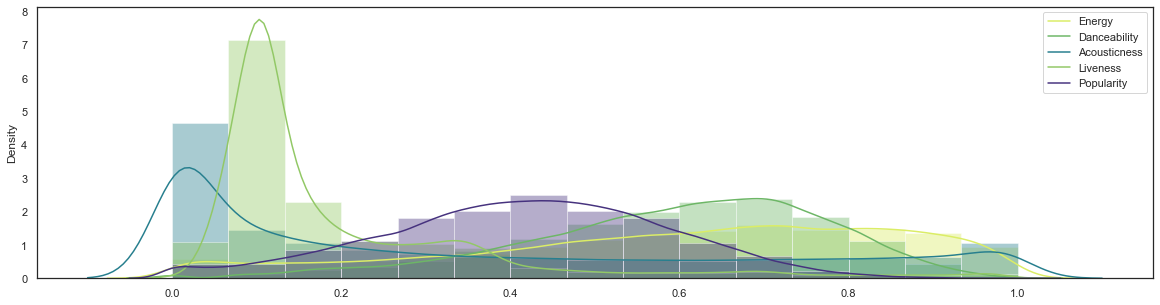

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(df_distribuciones['energy'],bins=15, color='#dbed66')
sns.distplot(df_distribuciones['danceability'],bins=15, color= '#6db666')
sns.distplot(df_distribuciones['acousticness'],bins=15,color='#277f8e')
sns.distplot(df_distribuciones['liveness'],bins=15, color='#92c866')
sns.distplot(df_distribuciones['popularity'],bins=15,color='#46327e')
plt.legend(labels=['Energy', 'Danceability', 'Acousticness','Liveness','Popularity'])
plt.xlabel(None)
plt.show()

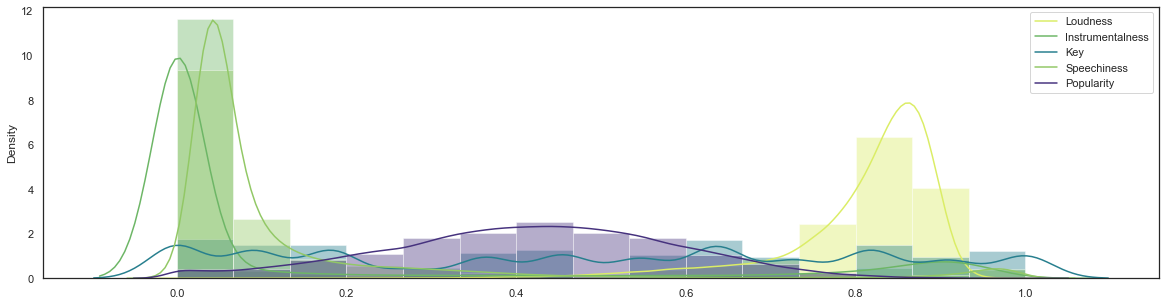

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(df_distribuciones['loudness'],bins=15, color='#dbed66')
sns.distplot(df_distribuciones['instrumentalness'],bins=15, color= '#6db666')
sns.distplot(df_distribuciones['key'],bins=15,color='#277f8e')
sns.distplot(df_distribuciones['speechiness'],bins=15, color='#92c866')
sns.distplot(df_distribuciones['popularity'],bins=15,color='#46327e')
plt.legend(labels=['Loudness', 'Instrumentalness', 'Key','Speechiness','Popularity'])
plt.xlabel(None)
plt.show()

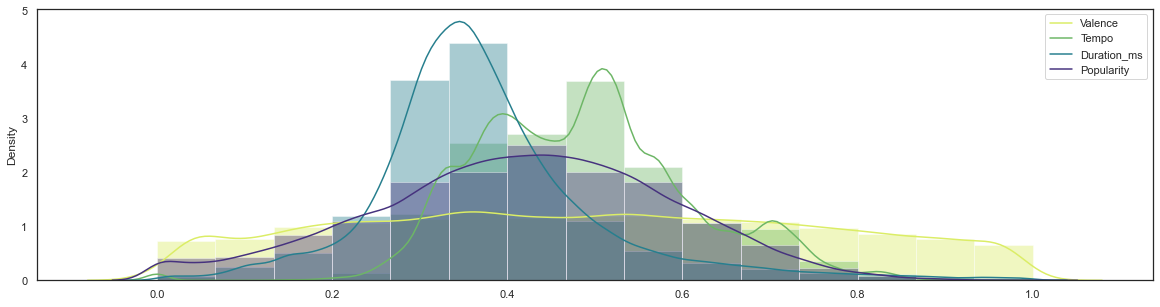

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(df_distribuciones['valence'],bins=15, color='#dbed66')
sns.distplot(df_distribuciones['tempo'],bins=15, color= '#6db666')
sns.distplot(df_distribuciones['duration_ms'],bins=15,color='#277f8e')
sns.distplot(df_distribuciones['popularity'],bins=15,color='#46327e')
plt.legend(labels=['Valence', 'Tempo', 'Duration_ms','Popularity'])
plt.xlabel(None)
plt.show()

## 8 Principal Component Analysis

Vamos a reducir la dimensionalidad de las variables consideradas audiofeatures

In [ ]:
#variables audiofeatures
print(var_audio_features)

['acousticness', 'liveness', 'loudness', 'danceability', 'energy', 'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo', 'valence']


In [ ]:
#dataframe
audio_features_full.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0         0.294     0.151    -7.447         0.698   0.606          0.000003   
2         0.750     0.938   -13.605         0.466   0.931          0.000000   
3         0.763     0.113   -20.254         0.719   0.126          0.000000   
4         0.770     0.917   -13.749         0.460   0.942          0.000000   
5         0.971     0.633    -7.740         0.367   0.349          0.296000   

   duration_ms   key  speechiness  valence    tempo  
0     235584.0  10.0       0.0262   0.6220  115.018  
2     492840.0   4.0       0.9440   0.0850   79.565  
3     316578.0   3.0       0.9380   0.5330  112.822  
4     558880.0   7.0       0.9430   0.0906   81.260  
5     183653.0  11.0       0.0268   0.1920   81.850

In [ ]:
#Separamos los features
x = data.loc[:, var_audio_features].values

In [ ]:
#Separamos los target
y = data.loc[:,['popularity_cat']].values

In [ ]:
#Estandarizamos los Features
x = StandardScaler().fit_transform(x)
x.shape

(98280, 11)

In [ ]:
# Media y desvío estandar
print("Media: ", np.mean(x), "Desvio Estandar: ", np.std(x))

Media:  -3.575454621799446e-17 Desvio Estandar:  1.0


### 8.1 Analisis con 2 componentes

La data original tiene 11 columnas, vamos a reducir a 2 dimensiones

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

principal component 1  principal component 2
0              -0.765054               0.052317
1               1.140882               2.038805
2               2.179379               3.223742
3               1.166553               1.655668
4               2.062482               0.607175

In [ ]:
principalDf.tail()

principal component 1  principal component 2
98275              -2.090408              -0.290492
98276              -0.826973              -1.776296
98277              -1.104567              -0.871336
98278              -1.213833               0.529214
98279              -1.669652              -0.595941

In [ ]:
print('Variacion explicada por los componentes principales: {}'.format(pca.explained_variance_ratio_))

#El componente 1 representa el 28% de la información, mientras que el componente 2 solo el 14%

Variacion explicada por los componentes principales: [0.28167627 0.1436823 ]


In [ ]:
#concatenamos el data frame con la columna popularity cat
finalDF = pd.concat([principalDf, data[['popularity_cat']]], axis = 1)
finalDF

principal component 1  principal component 2 popularity_cat
0                   -0.765054               0.052317          nohit
1                    1.140882               2.038805            NaN
2                    2.179379               3.223742          nohit
3                    1.166553               1.655668          nohit
4                    2.062482               0.607175          nohit
...                       ...                    ...            ...
101934                    NaN                    NaN          nohit
101935                    NaN                    NaN          nohit
101936                    NaN                    NaN            hit
101937                    NaN                    NaN            hit
101938                    NaN                    NaN          nohit

[101779 rows x 3 columns]

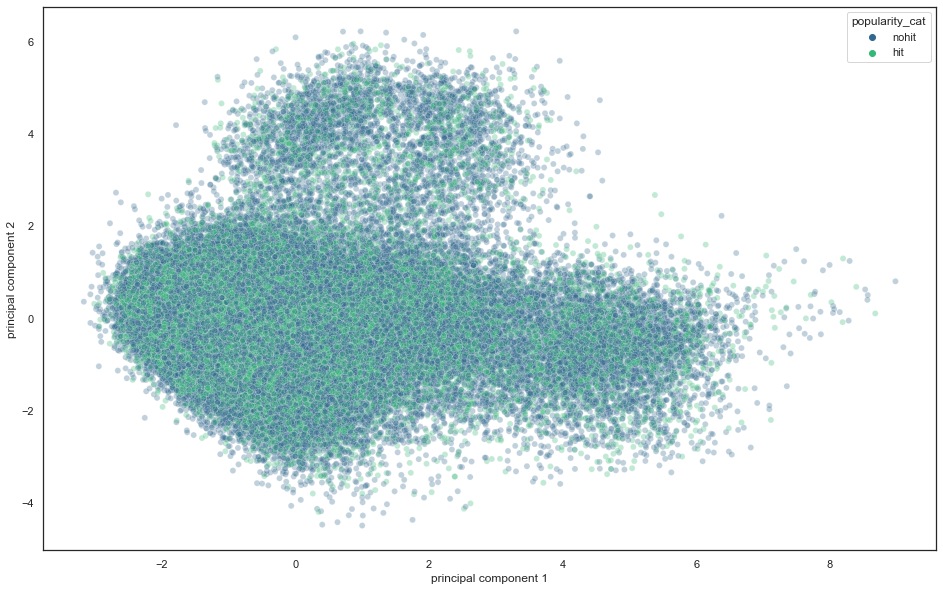

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="popularity_cat",
    palette=sns.color_palette("viridis", 2), #cambiamos de paleta para poder visualizar mejor
    data=finalDF,
    legend="full",
    alpha=0.3
)
plt.show()

Vemos que la información representada por los componentes principales en muy pequeña y por lo tanto, no observamos una separación de categorías

### 8.2 Analisis con 3 componentes

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
result = pd.DataFrame(data = principalComponents
             , columns=['PCA%i' % i for i in range(3)])

result.head()

PCA0      PCA1      PCA2
0 -0.765054  0.052317 -0.799898
1  1.140882  2.038805  5.607582
2  2.179379  3.223742  0.047856
3  1.166553  1.655668  5.559254
4  2.062482  0.607175  1.837933

In [ ]:
print('Variacion explicada por los componentes principales: {}'.format(pca.explained_variance_ratio_))

#El componente 0 representa el 28% de la información, el componente 1 solo el 14% y el 2 el 10%

Variacion explicada por los componentes principales: [0.28167627 0.1436823  0.10706777]


In [ ]:
# Usamos las categorias para hacer el plot
my_color=data['popularity_cat']
my_color.replace({"nohit": 0, "hit": 1}, inplace=True)
my_color

0         0
2         0
3         0
4         0
5         0
         ..
101934    0
101935    0
101936    1
101937    1
101938    0
Name: popularity_cat, Length: 98280, dtype: int64

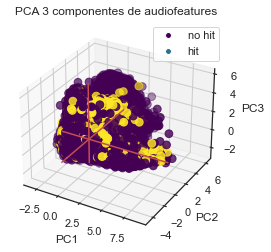

In [ ]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='w',markerfacecolor='#440154FF', marker='o', label='no hit'),
                   Line2D([0], [0], color='w',markerfacecolor='#2D708EFF', marker='o', label='hit')]




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'],c=my_color, cmap="viridis", s=60)
 
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3 componentes de audiofeatures")
plt.legend(labels=['no hit', 'hit'])
ax.legend(handles=legend_elements)
plt.show()


Al igual que con dos componentes, no se observa que los 3 componentes principales puedan diferenciar a las categorías entre si

In [ ]:
#volvemos la columna popularity_cat a sus valores originales
data['popularity_cat'].replace({0: "nohit" , 1:"hit"}, inplace=True)
data['popularity_cat'].tail()

101934    nohit
101935    nohit
101936      hit
101937      hit
101938    nohit
Name: popularity_cat, dtype: object

## 9 Save parcial del data frame

In [ ]:
data.to_csv("predatacat.csv") # A partir de ahora, trabajamos con este DataFrame


## 10 Algoritmos de clasificación

In [ ]:
#cargamos los datos
data= pd.read_csv('predatacat.csv')
data.head()

Unnamed: 0  acousticness  danceability  disc_number  duration_ms  energy  \
0           0         0.294         0.698          1.0     235584.0   0.606   
1           2         0.750         0.466          1.0     492840.0   0.931   
2           3         0.763         0.719          1.0     316578.0   0.126   
3           4         0.770         0.460          1.0     558880.0   0.942   
4           5         0.971         0.367          1.0     183653.0   0.349   

   instrumentalness   key  liveness  loudness  mode  popularity  speechiness  \
0          0.000003  10.0     0.151    -7.447   0.0        28.0       0.0262   
1          0.000000   4.0     0.938   -13.605   0.0        31.0       0.9440   
2          0.000000   3.0     0.113   -20.254   0.0        14.0       0.9380   
3          0.000000   7.0     0.917   -13.749   1.0        32.0       0.9430   
4          0.296000  11.0     0.633    -7.740   1.0        45.0       0.0268   

     tempo  time_signature  track_number  valence popularity_cat  
0  115.018             4.0           1.0   0.6220          nohit  
1   79.565             4.0           4.0   0.0850          nohit  
2  112.822             3.0           1.0   0.5330          nohit  
3   81.260             4.0           2.0   0.0906          nohit  
4   81.850             4.0           8.0   0.1920          nohit

In [ ]:
#seleccionamos los audiofeatures
data= data[["acousticness", "liveness", "loudness", "danceability",
                      "energy", "instrumentalness", "duration_ms",'key','speechiness','tempo','valence','popularity_cat']]

In [ ]:
data.columns

Index(['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence', 'popularity_cat'],
      dtype='object')

In [ ]:
data.dtypes

acousticness        float64
liveness            float64
loudness            float64
danceability        float64
energy              float64
instrumentalness    float64
duration_ms         float64
key                 float64
speechiness         float64
tempo               float64
valence             float64
popularity_cat       object
dtype: object

In [ ]:
data.info() # La data no contiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98280 entries, 0 to 98279
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      98280 non-null  float64
 1   liveness          98280 non-null  float64
 2   loudness          98280 non-null  float64
 3   danceability      98280 non-null  float64
 4   energy            98280 non-null  float64
 5   instrumentalness  98280 non-null  float64
 6   duration_ms       98280 non-null  float64
 7   key               98280 non-null  float64
 8   speechiness       98280 non-null  float64
 9   tempo             98280 non-null  float64
 10  valence           98280 non-null  float64
 11  popularity_cat    98280 non-null  object 
dtypes: float64(11), object(1)
memory usage: 9.0+ MB


In [ ]:
data.describe()

acousticness      liveness      loudness  danceability        energy  \
count  98280.000000  98280.000000  98280.000000  98280.000000  98280.000000   
mean       0.341988      0.197056     -9.196746      0.588939      0.595529   
std        0.330767      0.174351      5.963082      0.176147      0.255063   
min        0.000000      0.000000    -60.000000      0.000000      0.000000   
25%        0.038100      0.095500    -10.807000      0.483000      0.429000   
50%        0.224000      0.124000     -7.486000      0.612000      0.636000   
75%        0.622000      0.241000     -5.455000      0.717000      0.802000   
max        0.996000      0.999000      2.719000      0.989000      1.000000   

       instrumentalness    duration_ms           key   speechiness  \
count      98280.000000   98280.000000  98280.000000  98280.000000   
mean           0.146641  226166.226791      5.271245      0.120974   
std            0.302176   78054.759091      3.575273      0.188848   
min            0.000000    1155.000000      0.000000      0.000000   
25%            0.000000  183267.000000      2.000000      0.036200   
50%            0.000037  215427.000000      5.000000      0.050300   
75%            0.031900  256415.750000      8.000000      0.100000   
max            1.000000  601000.000000     11.000000      0.969000   

              tempo       valence  
count  98280.000000  98280.000000  
mean     118.654574      0.486627  
std       30.118277      0.260830  
min        0.000000      0.000000  
25%       96.050000      0.275000  
50%      118.801500      0.483000  
75%      136.269000      0.697000  
max      244.035000      0.993000

In [ ]:
data.groupby(by= "popularity_cat").size() #La data se encuentra desbalanceada

popularity_cat
hit      25355
nohit    72925
dtype: int64

In [ ]:
#Pasamos la variable target a dummy
data= pd.get_dummies(data, columns = ['popularity_cat'])

In [ ]:
data.columns

Index(['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence', 'popularity_cat_hit', 'popularity_cat_nohit'],
      dtype='object')

**Vamos a asentar las hipótesis**

- H0: La canción es un hit
- H1: La canción no es un hit

### 10.1 K-Nearest Neighbor (KNN)

Para realizar KNN la data no es necesario que se encuentre balanceada porque el algoritmo no está influenciado por el tamaño de la clase

#### 10.1.1 Selección de modelo y parámetros

In [ ]:
X = data[['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence']]
y = data[['popularity_cat_hit']]

#### 10.1.2 Entrenamiento del modelo

In [ ]:
#Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=11)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) #Con 3 vecinos
modelo = knn.fit(X_train, y_train)

C:\Users\Melisa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



#### 10.1.3 Predicción del modelo

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
print(predictions)

[1 1 0 ... 0 0 0]


#### 10.1.4 Matriz de confusión

In [ ]:
#MATRIZ DE CONFUSION
cm= confusion_matrix(y_test, predictions)
cm

array([[18227,  3653],
       [ 6072,  1532]], dtype=int64)

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  18227 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  1532 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  6072 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  3653 clasificaciones (Error tipo I)


### 10.2 SMOTE

Los algortimos de clasificación son sensibles a la cantidad de observaciones dentro de una clase. Los algoritmos Random Forest son sensibles a la data desbalanceada, ya que el algortimo tiende a sesgarse hacia la categoria con mayor cantidad de datos. La regresion logistica tambien es sensible a la data desbalanceada ya que afecta la pendiente de regresión

In [ ]:
X.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0         0.294     0.151    -7.447         0.698   0.606          0.000003   
1         0.750     0.938   -13.605         0.466   0.931          0.000000   
2         0.763     0.113   -20.254         0.719   0.126          0.000000   
3         0.770     0.917   -13.749         0.460   0.942          0.000000   
4         0.971     0.633    -7.740         0.367   0.349          0.296000   

   duration_ms   key  speechiness    tempo  valence  
0     235584.0  10.0       0.0262  115.018   0.6220  
1     492840.0   4.0       0.9440   79.565   0.0850  
2     316578.0   3.0       0.9380  112.822   0.5330  
3     558880.0   7.0       0.9430   81.260   0.0906  
4     183653.0  11.0       0.0268   81.850   0.1920

In [ ]:
y.head()

popularity_cat_hit
0                   0
1                   0
2                   0
3                   0
4                   0

In [ ]:
#Split traint-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
print(y_train.groupby(by= "popularity_cat_hit").size()) 
print("Vemos que las categorias se encuentran desbalanceadas antes del sobremuestreo")

popularity_cat_hit
0    51053
1    17743
dtype: int64
Vemos que las categorias se encuentran desbalanceadas antes del sobremuestreo


In [ ]:
# Estrategia de SobreMuestreo
sm = SMOTE(random_state = 42)

In [ ]:
# ajuste y transformacion
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [ ]:
#Despues del sobremuestreo
print(y_train_SMOTE.groupby(by= "popularity_cat_hit").size())
print("Las categorias se encuentran balanceadas entre si")

popularity_cat_hit
0    51053
1    51053
dtype: int64
Las categorias se encuentran balanceadas entre si


In [ ]:
X_train_SMOTE.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0      0.404000     0.114    -4.430         0.599   0.710          0.033000   
1      0.772000     0.104    -7.801         0.405   0.321          0.000000   
2      0.032600     0.781    -5.792         0.545   0.805          0.000000   
3      0.013100     0.192    -4.803         0.718   0.864          0.000117   
4      0.000003     0.136    -2.865         0.314   0.995          0.958000   

   duration_ms  key  speechiness    tempo  valence  
0     213500.0  1.0       0.0330   78.026    0.408  
1     254578.0  0.0       0.1060   77.702    0.223  
2     224169.0  0.0       0.0491  110.008    0.727  
3     260680.0  0.0       0.0436  156.026    0.523  
4     168000.0  1.0       0.1580  160.006    0.143

In [ ]:
y_train_SMOTE

popularity_cat_hit
0                        0
1                        0
2                        1
3                        1
4                        0
...                    ...
102101                   1
102102                   1
102103                   1
102104                   1
102105                   1

[102106 rows x 1 columns]

In [ ]:
X_train = pd.DataFrame(X_train_SMOTE, columns=X_train_SMOTE.columns)
X_train.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0      0.404000     0.114    -4.430         0.599   0.710          0.033000   
1      0.772000     0.104    -7.801         0.405   0.321          0.000000   
2      0.032600     0.781    -5.792         0.545   0.805          0.000000   
3      0.013100     0.192    -4.803         0.718   0.864          0.000117   
4      0.000003     0.136    -2.865         0.314   0.995          0.958000   

   duration_ms  key  speechiness    tempo  valence  
0     213500.0  1.0       0.0330   78.026    0.408  
1     254578.0  0.0       0.1060   77.702    0.223  
2     224169.0  0.0       0.0491  110.008    0.727  
3     260680.0  0.0       0.0436  156.026    0.523  
4     168000.0  1.0       0.1580  160.006    0.143

In [ ]:
#armamos el data frame para la data balanceada
data = X_train.join(y_train_SMOTE)
data.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0      0.404000     0.114    -4.430         0.599   0.710          0.033000   
1      0.772000     0.104    -7.801         0.405   0.321          0.000000   
2      0.032600     0.781    -5.792         0.545   0.805          0.000000   
3      0.013100     0.192    -4.803         0.718   0.864          0.000117   
4      0.000003     0.136    -2.865         0.314   0.995          0.958000   

   duration_ms  key  speechiness    tempo  valence  popularity_cat_hit  
0     213500.0  1.0       0.0330   78.026    0.408                   0  
1     254578.0  0.0       0.1060   77.702    0.223                   0  
2     224169.0  0.0       0.0491  110.008    0.727                   1  
3     260680.0  0.0       0.0436  156.026    0.523                   1  
4     168000.0  1.0       0.1580  160.006    0.143                   0

In [ ]:
data['popularity_cat_hit'].value_counts()
#el dataset ahora se encuentra balanceado -> podemos aplicar el algoritmo

0    51053
1    51053
Name: popularity_cat_hit, dtype: int64

### 10.3 ÁRBOL DE DECISION

#### 10.3.1 Selección de modelo y parámetros

In [ ]:
#separamos las variables independientes de la variable target
X = data.iloc[:,:-1]
y = data.iloc[:,11] #target

#### 10.3.2 Entrenamiento del modelo

In [ ]:
#split en train y test
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size=0.3,random_state=11)

In [ ]:
#arbol de decision
classifier= DecisionTreeClassifier(criterion='gini',min_samples_split=2)

In [ ]:
#Entrenamos el modelo
classifier.fit(Xtrain,Ytrain) 

DecisionTreeClassifier()

#### 10.3.3 Predicción del modelo

In [ ]:
predictions = classifier.predict(X_test)

#### 12.3.4 Matriz de confusión

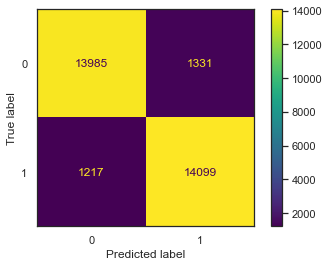

In [ ]:
#Matriz de Confusión
cm=confusion_matrix(y_test, predictions)
cm

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  15669 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  2939 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  4673 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  6203 clasificaciones (Error tipo I)


#### 12.3.5 Métricas

In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}") 

Accuracy of the classifier is: 0.916819012797075
Precision Score of the classifier is: 0.9137394685677253
Recall Score of the classifier is: 0.9205406111256202
F1 Score of the classifier is: 0.917127431210564


AUC for our classifier is: 0.9182627684791486


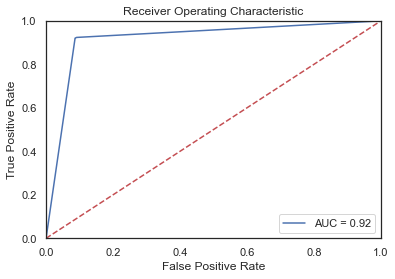

In [ ]:
#CURVA - ROC

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION ARBOL DE DECISION**: Vemos a partir de la matriz de confusión que el algoritmo cometió errores de clasificacion en menos del 10% de las clasificaciones. Esto se ve reflejado en el recall, que es bastante alto. El algortimo tiene una habilidad de más del 90% de encontrar verdaderos positivos (clasificar una canción como hit y que verdaderamente lo pueda llegar a ser en base a sus audio features)

### 10.4 RANDOM FOREST

#### 10.4.1 Selección de modelo y parámetros

Vamos a usar los mismos parametros que usamos para el Arbol de decision

In [ ]:
X

acousticness  liveness   loudness  danceability    energy  \
0           0.404000  0.114000  -4.430000      0.599000  0.710000   
1           0.772000  0.104000  -7.801000      0.405000  0.321000   
2           0.032600  0.781000  -5.792000      0.545000  0.805000   
3           0.013100  0.192000  -4.803000      0.718000  0.864000   
4           0.000003  0.136000  -2.865000      0.314000  0.995000   
...              ...       ...        ...           ...       ...   
102101      0.014015  0.090038  -3.617347      0.591003  0.773679   
102102      0.417000  0.114000  -6.864000      0.346000  0.552000   
102103      0.407827  0.576139 -11.949796      0.243553  0.513380   
102104      0.885311  0.078026 -28.218818      0.185828  0.053363   
102105      0.837623  0.170271 -17.035821      0.314596  0.225296   

        instrumentalness    duration_ms       key  speechiness       tempo  \
0               0.033000  213500.000000  1.000000     0.033000   78.026000   
1               0.000000  254578.000000  0.000000     0.106000   77.702000   
2               0.000000  224169.000000  0.000000     0.049100  110.008000   
3               0.000117  260680.000000  0.000000     0.043600  156.026000   
4               0.958000  168000.000000  1.000000     0.158000  160.006000   
...                  ...            ...       ...          ...         ...   
102101          0.000295  204183.466940  0.000000     0.047567   86.418517   
102102          0.000000  286481.282893  0.000000     0.028200   75.881000   
102103          0.000059  204667.000000  0.046356     0.066334  181.443777   
102104          0.971959  148812.476756  5.921513     0.048603   73.322145   
102105          0.075153  377215.365140  0.917833     0.034644  146.875288   

         valence  
0       0.408000  
1       0.223000  
2       0.727000  
3       0.523000  
4       0.143000  
...          ...  
102101  0.434623  
102102  0.078900  
102103  0.550560  
102104  0.030735  
102105  0.336915  

[102106 rows x 11 columns]

In [ ]:
y

0         0
1         0
2         1
3         1
4         0
         ..
102101    1
102102    1
102103    1
102104    1
102105    1
Name: popularity_cat_hit, Length: 102106, dtype: uint8

#### 10.4.2 Entrenamiento del modelo

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [ ]:
#Creamos un arbol de decisión sencillo y lo fiteamos
classifier = RandomForestClassifier(random_state=11)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

#### 10.4.3 Predicción del modelo

In [ ]:
predictions = classifier.predict(X_test) #Prediccion en Test

#### 10.4.4 Matriz de confusion

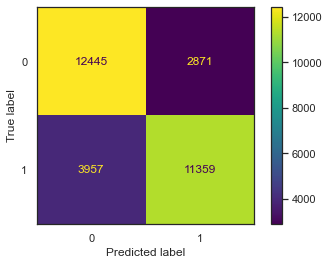

In [ ]:
#Matriz de Confusión
cm=confusion_matrix(y_test, predictions)
cm

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  12445 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  11359 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  3957 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  2871 clasificaciones (Error tipo I)


#### 10.4.5 Métricas

In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}") 

Accuracy of the classifier is: 0.7770958474797597
Precision Score of the classifier is: 0.7982431482782854
Recall Score of the classifier is: 0.7416427265604596
F1 Score of the classifier is: 0.7689027279496379


AUC for our classifier is: 0.8580859112642647


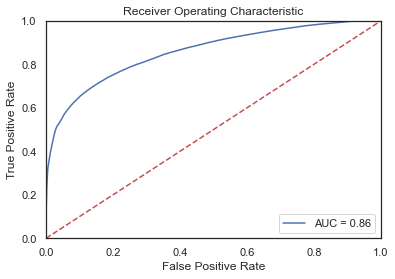

In [ ]:
#CURVA - ROC

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION RANDOM FOREST**: Vemos a partir de la matriz de confusión que el algoritmo cometió errores de clasificación en menos del 20% de las clasificaciones. Cometió aproximadamente un 36% de errores de tipo II al momento de clasificar, lo que podría conducir a que se prediga que las canciones no son hits en base a sus audiofeatures, pero que tienen todo el potencial para poder serlo. Este error podría llevar a una estrategia de MKT de no promocionar la canción y por lo tanto no se vuelva popular. Sin embargo, el algoritmo tiene una capacidad de encontrar en mas de un 80% canciones hits

### 10.5 REGRESION LOGISTICA

In [ ]:
#Vamos a escalar las variables para que todas esten entre 0 y 1

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled, columns= data.columns)

In [ ]:
data_scaled.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0      0.405622  0.114114  0.886015      0.605662   0.710          0.033000   
1      0.775100  0.104104  0.832268      0.409505   0.321          0.000000   
2      0.032731  0.781782  0.864299      0.551062   0.805          0.000000   
3      0.013153  0.192192  0.880068      0.725986   0.864          0.000117   
4      0.000003  0.136136  0.910968      0.317492   0.995          0.958000   

   duration_ms       key  speechiness     tempo   valence  popularity_cat_hit  
0     0.351480  0.090909     0.034056  0.321998  0.410876                 0.0  
1     0.420233  0.000000     0.109391  0.320661  0.224572                 0.0  
2     0.369337  0.000000     0.050671  0.453982  0.732125                 1.0  
3     0.430446  0.000000     0.044995  0.643889  0.526687                 1.0  
4     0.275326  0.090909     0.163055  0.660314  0.144008                 0.0

In [ ]:
data_scaled.shape

(102106, 12)

#### 10.5.1 Selección de modelo y parámetros

In [ ]:
#creamos una instancia de la regresion logistica
regresion_logistica = LogisticRegression()

In [ ]:
#Separamos en X e y
X = data_scaled.drop(["popularity_cat_hit"], axis=1)
y = data_scaled["popularity_cat_hit"]

In [ ]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

#### 10.5.2 Entrenamiento del modelo

In [ ]:
classifier=regresion_logistica.fit(X_train,y_train)

#### 10.5.3 Predicción del modelo

In [ ]:
predictions = regresion_logistica.predict(X_test)
print(predictions)

[0. 0. 0. ... 1. 0. 1.]


In [ ]:
#### 10.5.4 Matriz de confusion

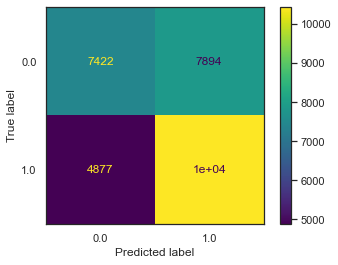

In [ ]:
#Matriz de Confusión
cm=confusion_matrix(y_test, predictions)
cm

#Ploteamos la Matriz
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  7422 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  10439 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  4877 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  7894 clasificaciones (Error tipo I)


#### 10.5.5 Métricas

In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}") 

Accuracy of the classifier is: 0.5830830504048055
Precision Score of the classifier is: 0.5694103529155076
Recall Score of the classifier is: 0.6815748237137634
F1 Score of the classifier is: 0.6204642039882315


AUC for our classifier is: 0.6107028836269727


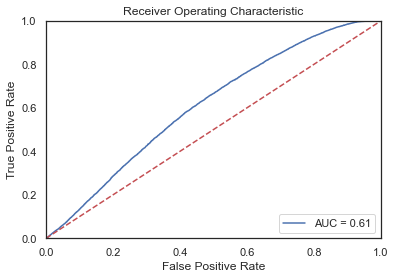

In [ ]:
#CURVA - ROC

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION REGRESION LOGISTICA**: El algoritmo tiene un AUC de 0.61 por lo tanto hay un 60% de probabilidades que el el algoritmo clasifique a una canción como un hit en base a sus audiofeatures- > 0.6≥AUC>0.5 se considera como un pobre discriminador. A partir de la matriz de confusión observamos que el algoritmo produjo muchos errores de tipo I, que también se ve reflejado en la métrica de precisión del 50%, lo que podría llevar a que una canción que el algoritmo clasificaría como hit en base a sus audiofeatures, en realidad no lo sea. Esto puede presentar una pérdida económica a la empresa ya que se entaría invirtiendo dinero y tiempo en promocionar una canción que no llamaría la atención

## 11 MEJORA DE MODELOS

Tenemos 2 modelos candidatos a la mejora:
- arbol = DecisionTreeClassifier()
- rf= RandomForest () 


### 11.1 Árbol de decision

In [ ]:
arbol = DecisionTreeClassifier()
data.head()

acousticness  liveness  loudness  danceability  energy  instrumentalness  \
0      0.404000     0.114    -4.430         0.599   0.710          0.033000   
1      0.772000     0.104    -7.801         0.405   0.321          0.000000   
2      0.032600     0.781    -5.792         0.545   0.805          0.000000   
3      0.013100     0.192    -4.803         0.718   0.864          0.000117   
4      0.000003     0.136    -2.865         0.314   0.995          0.958000   

   duration_ms  key  speechiness    tempo  valence  popularity_cat_hit  
0     213500.0  1.0       0.0330   78.026    0.408                   0  
1     254578.0  0.0       0.1060   77.702    0.223                   0  
2     224169.0  0.0       0.0491  110.008    0.727                   1  
3     260680.0  0.0       0.0436  156.026    0.523                   1  
4     168000.0  1.0       0.1580  160.006    0.143                   0

In [ ]:
X= data.drop(["popularity_cat_hit"], axis=1)
y= data["popularity_cat_hit"]

In [ ]:
# Dividimos los datos en Train y Test
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

Para hacer el gridSearch, justamente debemos insertar la grilla de hiperparametros que queremos que se toquen. Después usaremos las métricas proporcionadas por skelearn best_params_, best_score_ y cv_results_

In [ ]:
params_grid= {"criterion": ["gini", "entropy"],
              "max_depth": [1, 5, 10, 15,20,15,30],
              
              "max_features": ["auto", "sqrt", "log2"]}


model= GridSearchCV(arbol, params_grid, scoring= "accuracy", cv=5)

In [ ]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20, 15, 30],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [ ]:
print("Mejores hiperparametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparametros: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}
Mejor Score: 0.678358680961195



In [ ]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.042595      0.009214         0.005196        0.001167   
1       0.034198      0.003773         0.004196        0.000402   
2       0.032594      0.000795         0.004200        0.000410   
3       0.120585      0.003824         0.005199        0.001162   
4       0.115173      0.005267         0.005004        0.000008   

  param_criterion param_max_depth param_max_features  \
0            gini               1               auto   
1            gini               1               sqrt   
2            gini               1               log2   
3            gini               5               auto   
4            gini               5               sqrt   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 1, 'max_fea...           0.555999   
1  {'criterion': 'gini', 'max_depth': 1, 'max_fea...           0.530955   
2  {'criterion': 'gini', 'max_depth': 1, 'max_fea...           0.555999   
3  {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.613921   
4  {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.595103   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.557188           0.542567           0.538720           0.534840   
1           0.529486           0.542567           0.535082           0.522317   
2           0.530185           0.533263           0.531305           0.534840   
3           0.633788           0.628751           0.629101           0.600112   
4           0.625603           0.617768           0.638615           0.620750   

   mean_test_score  std_test_score  rank_test_score  
0         0.545863        0.009104               37  
1         0.532081        0.006668               41  
2         0.537118        0.009575               39  
3         0.621135        0.012455               31  
4         0.619568        0.014159               34

In [ ]:
#Ahora sí ya estamos en condición de realizar nuestras predicciones
prediction = model.predict(X_test)

Matriz de confusión:
[[ 9230  6086]
 [ 3880 11436]]


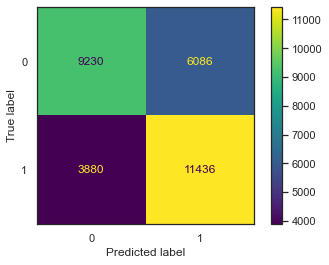

In [ ]:
# Matriz de Confusion
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  9230 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  11436 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  3880 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  6086 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

Accuracy of the classifier is: 0.916819012797075
Precision Score of the classifier is: 0.9137394685677253
Recall Score of the classifier is: 0.9205406111256202
F1 Score of the classifier is: 0.917127431210564


AUC for our classifier is: 0.7215784120866713


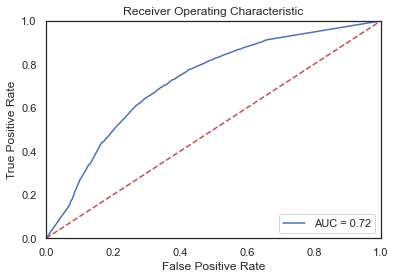

In [ ]:
#CURVA - ROC

class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION GRID SEARCH - ARBOL DE DECISION**: Se observa que el AUC para el modleo GridSearch es menor que para el del arbol de decision. La performance del modelo es mucho menor, por esto y en consecuencia del AUC elevado del modelo de árbol de decision da a pensar de que el modelo de árbol de decision se encuentra sobreajustado

### 11.2 RANDOM SEARCH: Mismos parametros, distinto entrenamiento

In [ ]:
params_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 5, 10, 15, 20, 15, 30],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
model_random= RandomizedSearchCV(arbol, params_grid, n_iter=18, random_state=11, cv=5)

In [ ]:
model_random.fit(X_train, y_train)
%time

Wall time: 0 ns


In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto'}
Mejor Score: 0.678358680961195



In [ ]:
prediction_rrf= model_random.predict(X_test)

Matriz de confusión:
[[ 9741  5575]
 [ 4355 10961]]


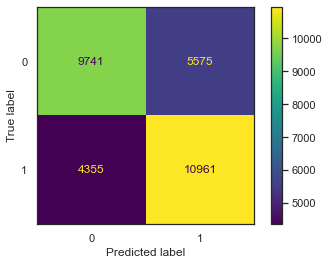

In [ ]:
cm = confusion_matrix(y_test,prediction_rrf)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(model_random, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  9741 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  10961 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  4355 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  5575 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, prediction_rrf)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, prediction_rrf)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, prediction_rrf)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, prediction_rrf)}")

Accuracy of the classifier is: 0.6758291982240794
Precision Score of the classifier is: 0.6628567972907595
Recall Score of the classifier is: 0.7156568294593889
F1 Score of the classifier is: 0.6882456360668089


AUC for our classifier is: 0.6779474491620457


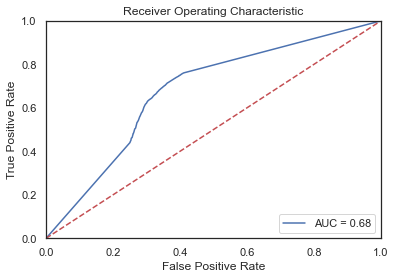

In [ ]:
#CURVA - ROC

class_probabilities = model_random.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION RANDOMIZED SEARCH**: Se obtuvo una performance mucho menor del modelo con respecto al modelo de árbol de decision original, probablemente porque la combinacion aleatoria de los modelos no encontró el mejor ajuste, o porque el modelo original se encuentra sobreajustado

### 11.3 RANDOMIZED FOREST

In [ ]:
model_random_rf= RandomizedSearchCV(arbol, params_grid, n_iter=18, random_state=11, cv=5)

In [ ]:
params_grid_rf= {"n_estimators":np.arange(100,201,20),
                 "criterion": ["gini", "entropy"],
                 "max_depth":np.arange(2,4),
                 "min_samples_split":np.arange(2,10),
                 "max_features": ["auto", "sqrt", "log2"],
                 "class_weight":["balanced", "balanced_subsample"],
                 "random_state":[11]}

In [ ]:
model_random_rf.fit(X_train, y_train)
%time

Wall time: 0 ns


In [ ]:
print("Los mejores hiperparámetros de la grilla son: "+ str(model_random_rf.best_params_))
print("Y el mejor score es: "+ str(model_random_rf.best_score_))

Los mejores hiperparámetros de la grilla son: {'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}
Y el mejor score es: 0.678246422880955


In [ ]:
prediction_rrf= model_random_rf.predict(X_test)

Matriz de confusión:
[[ 9952  5364]
 [ 4676 10640]]


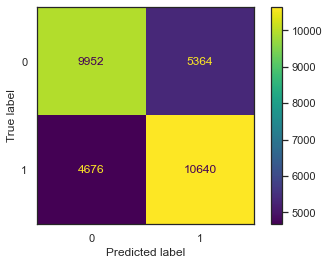

In [ ]:
cm = confusion_matrix(y_test,prediction_rrf)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(model_random_rf, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  9952 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  10640 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  4676 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  5364 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, prediction_rrf)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, prediction_rrf)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, prediction_rrf)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, prediction_rrf)}")

Accuracy of the classifier is: 0.6722381822930269
Precision Score of the classifier is: 0.664833791552112
Recall Score of the classifier is: 0.6946983546617916
F1 Score of the classifier is: 0.6794380587484036


AUC for our classifier is: 0.6665619809230339


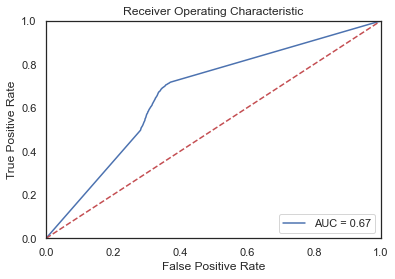

In [ ]:
#CURVA - ROC

class_probabilities = model_random_rf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION RANDOMIZED FOREST**: Se obtuvo el mismo patron que para el randomized classification tree; Se obtuvo una performance mucho menor del modelo con respecto al modelo original, probablemente porque la combinacion aleatoria de los modelos no encontró el mejor ajuste, o porque el modelo original se encuentra sobreajustado

## 12 BOOSTING Y MODELOS DE ENSAMBLE

In [ ]:
#marco mis variables de interés
X = data[['acousticness', 'liveness', 'loudness', 'danceability', 'energy',
       'instrumentalness', 'duration_ms', 'key', 'speechiness', 'tempo',
       'valence']]
y = data[['popularity_cat_hit']]

### 12.1 ADABOOST

In [ ]:
#Separación en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Creamos un AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [ ]:
#Fiteamos el modelo
model = ada.fit(X_train, y_train)

C:\Users\Melisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
#Predicción!
y_pred = model.predict(X_test)

Matriz de confusión:
[[10094  5174]
 [ 3995 11369]]


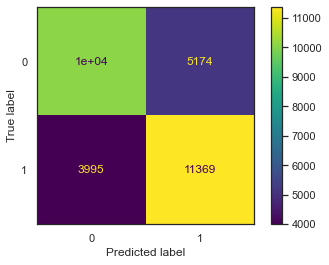

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(ada, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  10094 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  11369 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  3995 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  5174 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.700672499347088
Precision Score of the classifier is: 0.6872393157226622
Recall Score of the classifier is: 0.7399765686019266
F1 Score of the classifier is: 0.7126335913749333


AUC for our classifier is: 0.7850664478756262


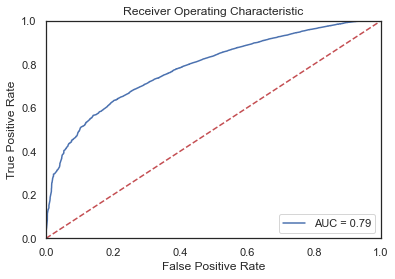

In [ ]:
#CURVA - ROC

class_probabilities = ada.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION ADABOOST**: A partir de las métricas y de la matriz de confusion observamos que el modelo tiene un recall del 74%, lo que indica que tiene una habilidad aceptable para encontrar verdaderos positivos, es decir canciones que sean hits

### 12.2 XGBOOST

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)

In [ ]:
clf_xgb.fit(X_train,y_train) #Entrenamos el modelo

C:\Users\Melisa\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Melisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[18:47:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
y_pred = clf_xgb.predict(X_test) 

Matriz de confusión:
[[13279  1989]
 [ 4769 10595]]


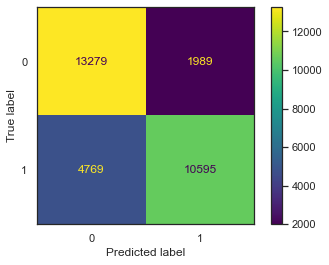

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(clf_xgb, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  13279 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  10595 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  4769 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  1989 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.779381039435884
Precision Score of the classifier is: 0.8419421487603306
Recall Score of the classifier is: 0.6895990627440771
F1 Score of the classifier is: 0.7581937884642909


AUC for our classifier is: 0.8552206265670297


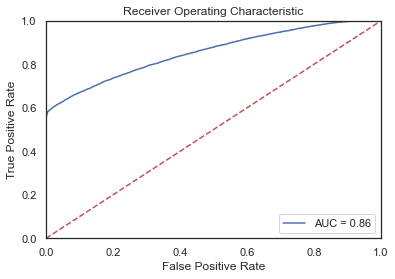

In [ ]:
#CURVA - ROC

class_probabilities = clf_xgb.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION XGBOOST**: El algoritmo posee metricas aceptables a la hora de realizar la clasificacion y poder encontrar verdaderos hits. En la ROC AUC se observa que a bajas tasas de falsos positivos, el algoritmo tiene un rate de 60% de verdaderos positivos (canciones que son hits). Por lo tanto, cuando la tasa de verrdaderos positivos de este algoritmo es alta, la tasa de falsos positivos es muy baja.

### 12.3 LIGHTGBM

In [ ]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

C:\Users\Melisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Matriz de confusión:
[[14759   509]
 [ 5653  9711]]


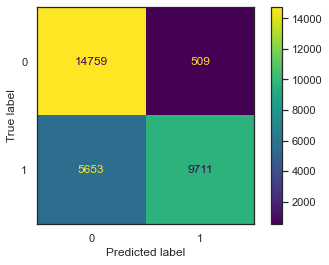

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  14759 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  9711 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  5653 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  509 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.7988378166623139
Precision Score of the classifier is: 0.9501956947162427
Recall Score of the classifier is: 0.6320619630304608
F1 Score of the classifier is: 0.7591463414634145


AUC for our classifier is: 0.8707842769200695


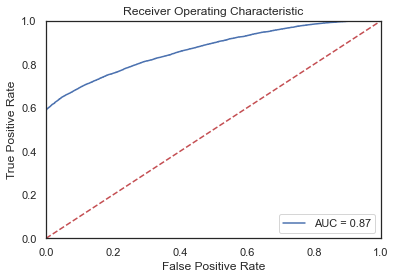

In [ ]:
#CURVA - ROC

class_probabilities = clf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION LIGHTGBM**: Las metricas obtenidas para este modelo son muy similares al XGBOOST y se observa el mismo patron en la curva ROC-AUC: cuando la tasa de verdaderos positivos es muy alta (canciones que son hits vedaderamente), la tasa de falsos positivos es muy baja (canciones que no son hits verdaderamente) 

### 12.4 GRADIENTBOOST

In [ ]:
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_test)

C:\Users\Melisa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Matriz de confusión:
[[13937  1331]
 [ 5085 10279]]


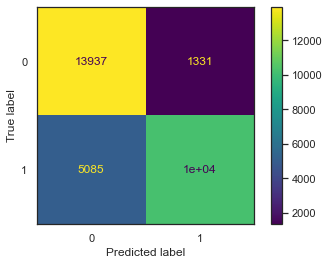

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print("Matriz de confusión:")
print(cm)

#Ploteamos la Matriz
plot_confusion_matrix(gbrt, X_test, y_test)
plt.show()

In [ ]:
print("Predijo que la cancion no es un hit (0) y verdaderamente no eran hits: ", cm[0,0], "clasificaciones")
print("Predijo que la cancion es un hit (1) y verdaderamente lo es: ", cm[1,1], "clasificaciones")
print("Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1): ", cm[1,0], "clasificaciones (Error tipo II)")
print("Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0): ", cm[0,1], "clasificaciones (Error tipo I)")


Predijo que la cancion no es un hit (0) y verdaderamente no eran hits:  13937 clasificaciones
Predijo que la cancion es un hit (1) y verdaderamente lo es:  10279 clasificaciones
Predijo que la canción no es un hit(0), pero verdaderamente eran hits(1):  5085 clasificaciones (Error tipo II)
Predijo que la canción es un hit(1), pero verdaderamente no lo eran(0):  1331 clasificaciones (Error tipo I)


In [ ]:
#ACCURACY
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

#PRECISION -> mide la calidad del algoritmo en base a las verdaderos positivos y los falsos positivos
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}") 

#RECALL-> La habilidad del algoritmo de encontrar los verdaderos positivos
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")

#F1->MEDIA ENTRE PRECISION Y RECALL
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.7905458344215199
Precision Score of the classifier is: 0.8853574504737295
Recall Score of the classifier is: 0.6690315022129654
F1 Score of the classifier is: 0.7621413212723364


AUC for our classifier is: 0.8580036422240437


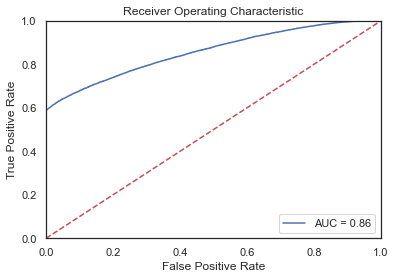

In [ ]:
#CURVA - ROC

class_probabilities = gbrt.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**CONCLUSION GRADIENT BOOST**: Obtuvo una performance bastante similar a los dos modelos de boosting previos

##### **CONCLUSION BOOSTING DE MODELOS**:
Los modelos XGBOOST, LIGHTGBM y GRADIENTBOOST obtuvieron perfomances similares, con la particularidad de que los tres tienen una tasa de falsos positivos muy baja cuando la tasa de verdaderos positivos es alta. Sin embargo al elegir un algoritmo de boosting se elige a XGBOOST por proporcionar resultados similares que los demás, pero con bajo costo de optimización.